# Forecasting The Spanish Electricity Power Generation Load and Cost of MWH USING ARIMA and DEEP Leering - TensorFlow LSTM
Analysis and Model Development by Tamer Hanna


## Abstract 

The objective of this project is to perform various Time Series Analysis and modeling to understand the Power generation market of Spain and to be able to predict the hourly load and use it for the prediction of the Euro per Megawatt hour.

Several open datasets from different websites are used in this analysis.

1- The Power Generation dataset that includes all the different sources of generation (hourly dataset for records between 31st Dec. 2014 to 31st Dec 2018 1,016,305 records of data)

2- Weather conditions in Spain (Temperature, Humidity, Pressure, Rain, clouds) for 5 big cities  (hourly dataset for weather records between 31st Dec. 2014 to 31st Dec 2018 3,032,732 for ['Valencia' 'Madrid' 'Bilbao' ' Barcelona' 'Seville'])

3- Global price of Coal monthly average for the period between 2015 and 2020 in USD (49 records)

4- History of Henry Hub natural gas prices in USD for the last 10 years (3290 records)

5- West Texas Intermediate (WTI or NYMEX) crude oil prices per barrel from 2008 to 2020 in USD (3268 records) 

6- Euro Dollar Daily Exchange Rate (EUR USD) - for the period starting from 1999 to 2020 (5825 records)
  


Datasets links 

https://www.kaggle.com/nicholasjhana/energy-consumption-generation-prices-and-weather

https://www.macrotrends.net/1369/crude-oil-price-history-chart

https://www.macrotrends.net/2478/natural-gas-prices-historical-chart

https://www.macrotrends.net/2548/euro-dollar-exchange-rate-historical-chart

https://fred.stlouisfed.org/series/PCOALAUUSDM#0


## Introduction

In this notebook I am exploring the Power Generation sector in Spain and what is affecting the price of MWH. the models built is to allow the privet power generation plants to be able to bid on the generation through forecasting the hourly load and the cost
We are trying to predict the hourly load based on the hourly history of using ARIMA model and the cost of the MWH in EUROS using Tensor flow- LSTM deep learning model 


The Electrical Energy Generation Price depends on several factors that affects the cost built in it, and it is divided into Fixed cost and variable costs that is based on several inputs as :

1- The Load or the required electric consumption which is affected by several factors as the weak days and hours, weather conditions, population density. 

2- The Generation Facility running costs in terms of Operations and maintenance and initial capital invested in it 

3- The Fuel cost that is changing from day to day. 

4- The transmission cost.

The Datasets we are using should be able to help in forecasting the price range and the load with the all the variables and history of data provided. 
The Energy dataset is composed of energy demand, The Generation load from different sources and price of MWH and forecasted price.  The dataset is unique because it contains hourly data for electrical consumption and the respective forecasts for consumption and pricing. This allows prospective forecasts to be benchmarked against the current state of the art forecasts being used in industry. Based on the various approaches to implementing a time series application.
By adding the market prices change of the fuels used in generation and the exchange rate from USD to Euros this can add more forecasting power to the models for forecasting the price


## Ethical ML Framework

### Data Governance:

As the goal of this report is only to research the time series methods, many aspects of the ethical ML framework do not directly apply.
The dataset used in this report are accessible to the public websites for the study and analysis of machine learning technics and not for any business use and does not require any approval or request to use it for this reason as stated by the publishers  
1-	ENTSOE(European Network of Transmission System Operators for Electricity), a public portal for Transmission Service Operator (TSO) data. Settlement prices were obtained from the Spanish TSO Red Electric Espana. 
2-	Weather data is available on Kaggle by owner and open to public study use.
3-	Prices of Fuels and exchange rate are available and open for public use are from Micro trends and Fred Economic data research 

This data is used as provided on the websites without any certificates or confirmation of the accuracy of and is not tested or verified by any sort test or expert or compared to any source of data through calibrated devices. However, since this data will be used for the discovery of the machine learning tools and techniques and not to drive any decision related to Energy usage or cost analysis then these verifications are not required for the purpose of this report

### Accuracy/Trust of the model:
The output models and analysis of this report are not intended to be put in use or even to be used to give any advice related to the field or energy usage or environment affect or socioeconomic studies 
The data and the analysis are manly done for the exploration of the Data Science and may be some assumptions and interpolations are done that will affect the result of the analysis

### Social Impact 
Since this report is focused on exploring the Machine learning tools and technics the inputs, outputs and results are not verified and could have a negative affect or biases on the community.
 It also should not be used in any decisions that could have a Social Impact or through businesses operations and decisions related to sustainability in the Energy sector. 

In case of applying the same techniques in life scenario, the machine learning techniques, data inputs and results should be assessed against the ML framework for the Social Impact, Accuracy/Trust and Governance


In [705]:
# Libraries used 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import tensorflow as tf
import xgboost as xgb
import warnings
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, TimeDistributed, Flatten, Dropout
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import math
from math import sqrt
from pylab import rcParams
import itertools
from statsmodels.tsa.api import VAR
from random import randrange
from pandas import Series
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [706]:
# Importing the datasets
energy = pd.read_csv('C:/Users/16472/OneDrive/Documents/Data analytics/Advanced course Big data/Course 2/Project 3/dataset/energy_dataset.csv')


In [707]:
energy.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [708]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [709]:
weather = pd.read_csv('C:/Users/16472/OneDrive/Documents/Data analytics/Advanced course Big data/Course 2/Project 3/dataset/weather_features.csv')

In [710]:
weather.head(10)

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
5,2015-01-01 05:00:00+01:00,Valencia,270.292,270.292,270.292,1004,71,2,321,0.0,0.0,0.0,0,800,clear,sky is clear,01n
6,2015-01-01 06:00:00+01:00,Valencia,270.292,270.292,270.292,1004,71,2,321,0.0,0.0,0.0,0,800,clear,sky is clear,01n
7,2015-01-01 07:00:00+01:00,Valencia,270.292,270.292,270.292,1004,71,2,321,0.0,0.0,0.0,0,800,clear,sky is clear,01n
8,2015-01-01 08:00:00+01:00,Valencia,274.601,274.601,274.601,1005,71,1,307,0.0,0.0,0.0,0,800,clear,sky is clear,01d
9,2015-01-01 09:00:00+01:00,Valencia,274.601,274.601,274.601,1005,71,1,307,0.0,0.0,0.0,0,800,clear,sky is clear,01d


In [711]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

In [712]:
oil_price = pd.read_csv('C:/Users/16472/OneDrive/Documents/Data analytics/Advanced course Big data/Course 2/Project 3/dataset/Crude oil price.csv')

In [713]:
oil_price.head()

,date,value
0,2008-03-07,105.12
1,2008-03-10,107.90
2,2008-03-11,108.73
3,2008-03-12,109.86
4,2008-03-13,110.21


In [714]:
oil_price.describe()

,value
count,3268.000000
mean,70.731513
std,24.436998
min,11.258000
25%,49.970000
50%,67.245000
75%,92.845000
max,145.310000


In [715]:
ntrl_gas_price = pd.read_csv('C:/Users/16472/OneDrive/Documents/Data analytics/Advanced course Big data/Course 2/Project 3/dataset/natural gas prices.csv')

In [716]:
ntrl_gas_price.head()

,date,value
0,2008-03-07,9.82
1,2008-03-10,9.59
2,2008-03-11,9.85
3,2008-03-12,9.69
4,2008-03-13,9.74


In [717]:
coal_price = pd.read_csv('C:/Users/16472/OneDrive/Documents/Data analytics/Advanced course Big data/Course 2/Project 3/dataset/Coal_prices.csv')

In [718]:
coal_price.head()

,time,coal_price
0,2015-01-01,64.716327
1,2015-02-01,70.659107
2,2015-03-01,68.344968
3,2015-04-01,61.197857
4,2015-05-01,65.671241


In [719]:
xchg_rate = pd.read_csv('C:/Users/16472/OneDrive/Documents/Data analytics/Advanced course Big data/Course 2/Project 3/dataset/euro_dollar_xch.csv')

In [720]:
xchg_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5825 entries, 0 to 5824
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    5825 non-null   object 
 1    value  5825 non-null   float64
dtypes: float64(1), object(1)
memory usage: 91.1+ KB


In [721]:
parse_dates=[energy.time]
parse_dates=[weather.dt_iso]
parse_dates=[oil_price.date]
parse_dates=[ntrl_gas_price.date]
parse_dates=[xchg_rate.date]

In [722]:
energy.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,...,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,...,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,...,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,...,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,...,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,...,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [723]:
weather.describe()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
count,178396.000000,178396.000000,178396.000000,1.783960e+05,178396.000000,178396.00000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000
mean,289.618605,288.330442,291.091267,1.069261e+03,68.423457,2.47056,166.591190,0.075492,0.000380,0.004763,25.073292,759.831902
std,8.026199,7.955491,8.612454,5.969632e+03,21.902888,2.09591,116.611927,0.398847,0.007288,0.222604,30.774129,108.733223
min,262.240000,262.240000,262.240000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000
25%,283.670000,282.483602,284.650000,1.013000e+03,53.000000,1.00000,55.000000,0.000000,0.000000,0.000000,0.000000,800.000000
50%,289.150000,288.150000,290.150000,1.018000e+03,72.000000,2.00000,177.000000,0.000000,0.000000,0.000000,20.000000,800.000000
75%,295.150000,293.730125,297.150000,1.022000e+03,87.000000,4.00000,270.000000,0.000000,0.000000,0.000000,40.000000,801.000000
max,315.600000,315.150000,321.150000,1.008371e+06,100.000000,133.00000,360.000000,12.000000,2.315000,21.500000,100.000000,804.000000


## Data Cleaning 

### Energy Genration dataset Cleaning

In [586]:
#Data Cleaning : Checking for null values 
energy.isnull().sum()

time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

We found 2 Important findings from the above 2 steps 

1- The following columns has 0 values for all cells 'generation fossil coal-derived gas	' , 'generation fossil oil shale', generation fossil peat', 'generation geothermal	','generation wind offshore	','

2- ' generation hydro pumped storage aggregated' and 'forecast wind offshore eday ahead' are all null value so we will drop these 2 coulmns and the rest of null values we willl will look at them later

We will have to drop all these columns from the dataset

In [587]:
# Drop empty columns
energy.drop(columns=['generation hydro pumped storage aggregated',
                     'forecast wind offshore eday ahead','generation fossil coal-derived gas',
                     'generation fossil oil shale',
                     'generation fossil peat',
                     'generation geothermal',
                     'generation marine',
                     'generation wind offshore'], inplace =True)

In [588]:
#Checking datatypes
energy.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.000000,35046.000000,35046.000000,35046.000000,35045.000000,35045.000000,35045.000000,35046.000000,35047.000000,35046.000000,35046.000000,35046.000000,35045.000000,35046.000000,35064.000000,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,5622.737488,4256.065742,298.319789,475.577343,972.116108,2605.114735,6263.907039,60.228585,85.639702,1432.665925,269.452133,5464.479769,1439.066735,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,2201.830478,1961.601013,52.520673,792.406614,400.777536,1835.199745,839.667958,20.238381,14.077554,1680.119887,50.195536,3213.691587,1677.703355,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,4126.000000,2527.000000,263.000000,0.000000,637.000000,1077.250000,5760.000000,53.000000,73.000000,71.000000,240.000000,2933.000000,69.000000,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,4969.000000,4474.000000,300.000000,68.000000,906.000000,2164.000000,6566.000000,57.000000,88.000000,616.000000,279.000000,4849.000000,576.000000,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,6429.000000,5838.750000,330.000000,616.000000,1250.000000,3757.000000,7025.000000,80.000000,97.000000,2578.000000,310.000000,7398.000000,2636.000000,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,20034.000000,8359.000000,449.000000,4523.000000,2000.000000,9728.000000,7117.000000,106.000000,119.000000,5792.000000,357.000000,17436.000000,5836.000000,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [589]:
#converting time format to index

energy['time'] = pd.to_datetime(energy['time'], utc=True, infer_datetime_format=True)
energy = energy.set_index('time')

In [590]:
energy.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04


In [591]:
# checking the nan values within the 
# Gather generation columns
gen_cols = [col for col in energy.columns if col.startswith('generation')]
# gen cols + total generation
total_gen_cols = gen_cols.copy()
total_gen_cols.append('total load actual')

In [592]:
energy.loc[energy['generation biomass'].isnull()][total_gen_cols]

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual
time,,,,,,,,,,,,,,,
2015-01-05 02:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21182.0
2015-01-05 11:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05 12:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05 13:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05 14:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05 15:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05 16:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-19 18:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39304.0
2015-01-19 19:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39262.0


We will try to plot a zoom on the a period which is missing some values

In [593]:
# Define a function to plot different types of time-series fro the analysis 

def plot_series(df=None, column=None, series=pd.Series([]), label=None, ylabel=None, title=None, start=0, end=None):
    """
    Plots a certain time-series which has either been loaded in a dataframe and which
    constitutes one of its columns or it a custom pandas series created by the user.
    The user can define either the 'df' and the 'column' or the 'series' and additionally,
    can also define the 'label', the 'ylabel', the 'title', the 'start' and the 'end' of the plot.
    """
    sns.set()
    fig, ax = plt.subplots(figsize=(30, 12))
    ax.set_xlabel('Time', fontsize=16)
    if column:
        ax.plot(df[column][start:end], label=label)
        ax.set_ylabel(ylabel, fontsize=22)
    if series.any():
        ax.plot(series, label=label)
        ax.set_ylabel(ylabel, fontsize=22)
    if label:
        ax.legend(fontsize=22)
    if title:
        ax.set_title(title, fontsize=30)
    ax.grid(True)
    return ax

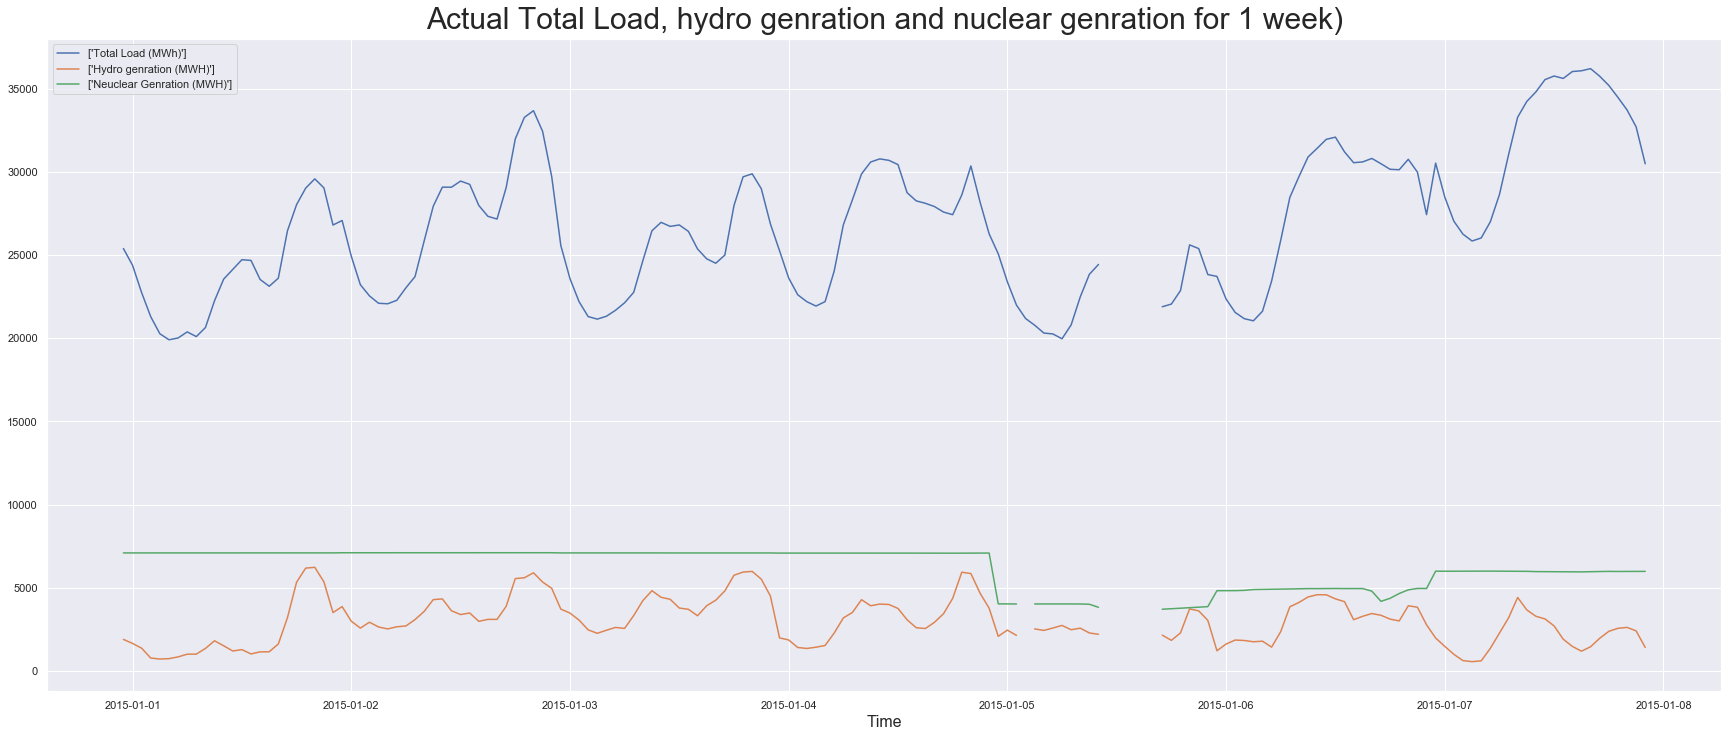

In [594]:
# Zoom into the plot of the hourly (actual) total load

ax = plot_series(df=energy, column=['total load actual','generation hydro water reservoir','generation nuclear'], 
                 title='Actual Total Load, hydro genration and nuclear genration for 1 week)', end=24*7*1)
ax.legend((['Total Load (MWh)'], ['Hydro genration (MWH)'],['Neuclear Genration (MWH)']))
plt.show()


From the above curve and table:

1- It appears that te null values are common across all the genration plant types and the total so this means we will not be abel to calculate the values and we will have to interpolate this values using linear interpolation 

2- As we know from the power genrtaion concepts Neuclear power genration load and demand is alwyas required to be stable for longer periods and the flutiuations in the load are manged through the other types of genration

In [595]:
# Fill null values using interpolation with both directions forword and backword

energy.interpolate(method='linear', limit_direction='both', inplace=True, axis=0)

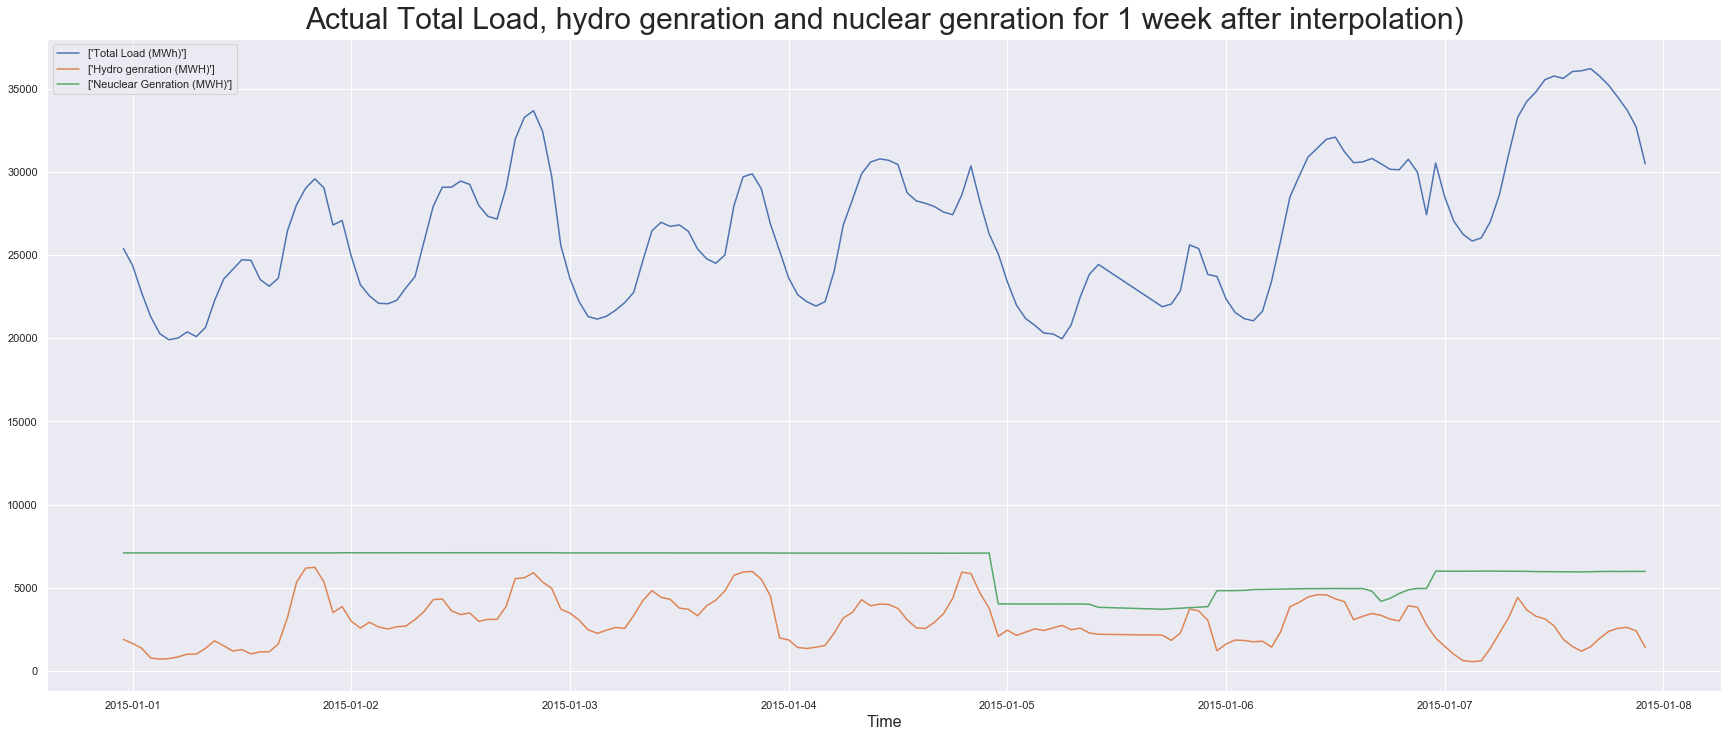

In [601]:
# Zoom into the plot of the hourly (actual) total load

ax = plot_series(df=energy, column=['total load actual','generation hydro water reservoir','generation nuclear'], 
                 title='Actual Total Load, hydro genration and nuclear genration for 1 week after interpolation)', end=24*7*1)
ax.legend((['Total Load (MWh)'], ['Hydro genration (MWH)'],['Neuclear Genration (MWH)']))
plt.show()

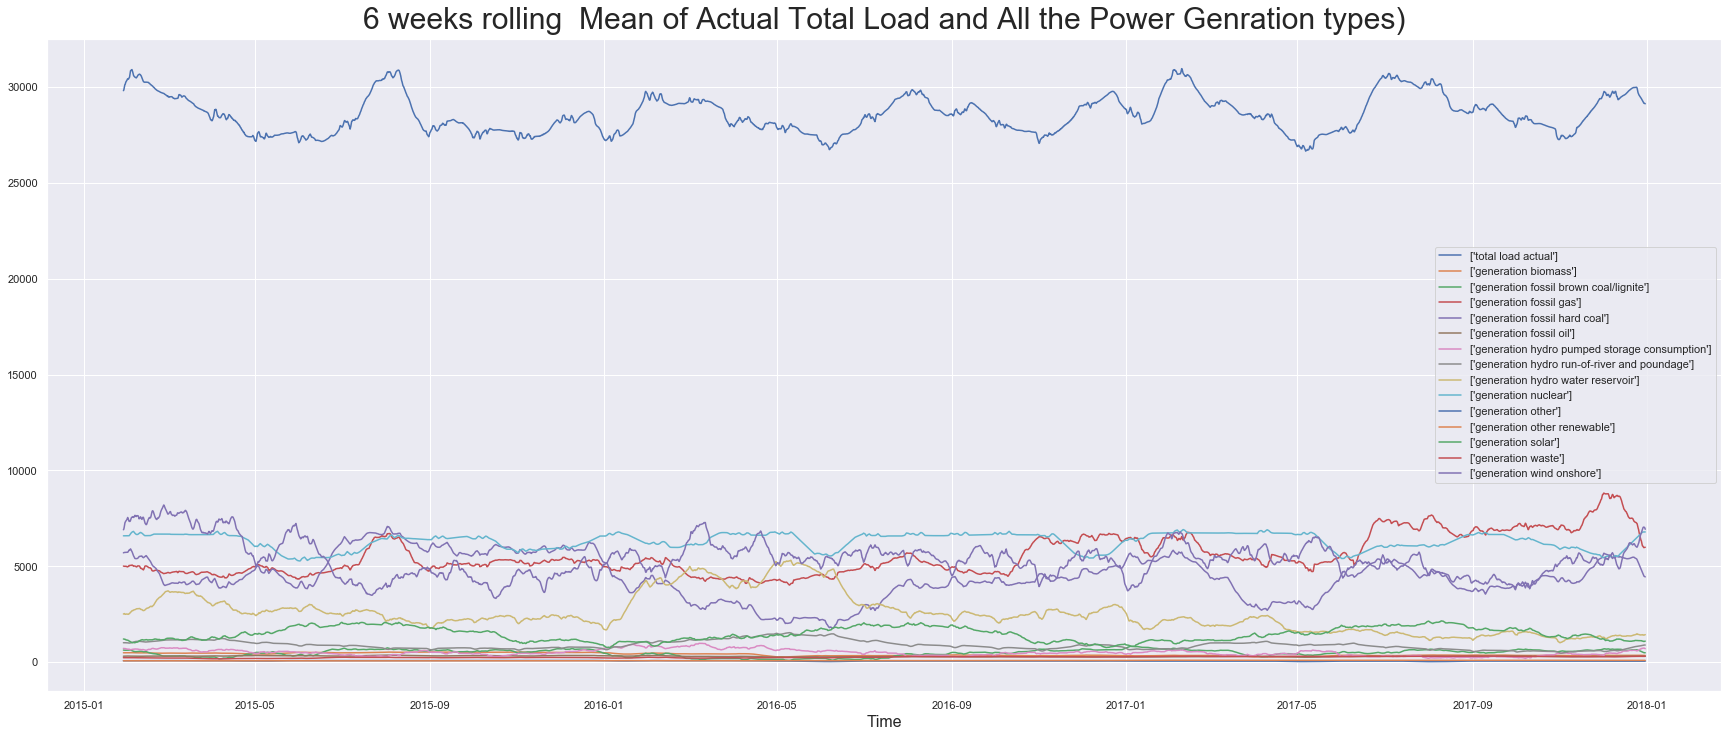

In [615]:
# Zoom into the plot of the hourly (actual) total load

ax = plot_series(df=energy.rolling(window=24*7*4).mean(), column=['total load actual','generation biomass','generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 'generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage', 
'generation hydro water reservoir',
'generation nuclear',
'generation other',
'generation other renewable',
'generation solar',
'generation waste',
'generation wind onshore'],                        
title='6 weeks rolling  Mean of Actual Total Load and All the Power Genration types)' , end=24*365*3)
ax.legend((['total load actual'],
        ['generation biomass'],
        ['generation fossil brown coal/lignite'], 
        ['generation fossil gas'], 
        ['generation fossil hard coal'],
        ['generation fossil oil'], 
        ['generation hydro pumped storage consumption'], 
        ['generation hydro run-of-river and poundage'], 
['generation hydro water reservoir'],
['generation nuclear'],
['generation other'],
['generation other renewable'],
['generation solar'],
['generation waste'],
['generation wind onshore']))
plt.show()

As We can see and understand from the above graph the destribution of the genration across resources varies but some resource are dominant and stable as the neuclear plants as fluctiuation is not easy to do durig the opertaions of such plants. 

We can see alot of fluctiation between fossil fuels manly the coal and gas plants and clean energy resources and hydor flutiuates depending on the weather and season of the year.

It seems also that the genration from waste is does not have a big persentage of the spanish grid genration

In [28]:
#Data Cleaning : Checking for null values after cleaning
print(energy.isnull().sum())
#checking any duplicates
print(energy.duplicated(keep='first').sum())

generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind onshore                        0
forecast solar day ahead                       0
forecast wind onshore day ahead                0
total load forecast                            0
total load actual                              0
price day ahead                                0
price actual                                   0
dtype: int64
0


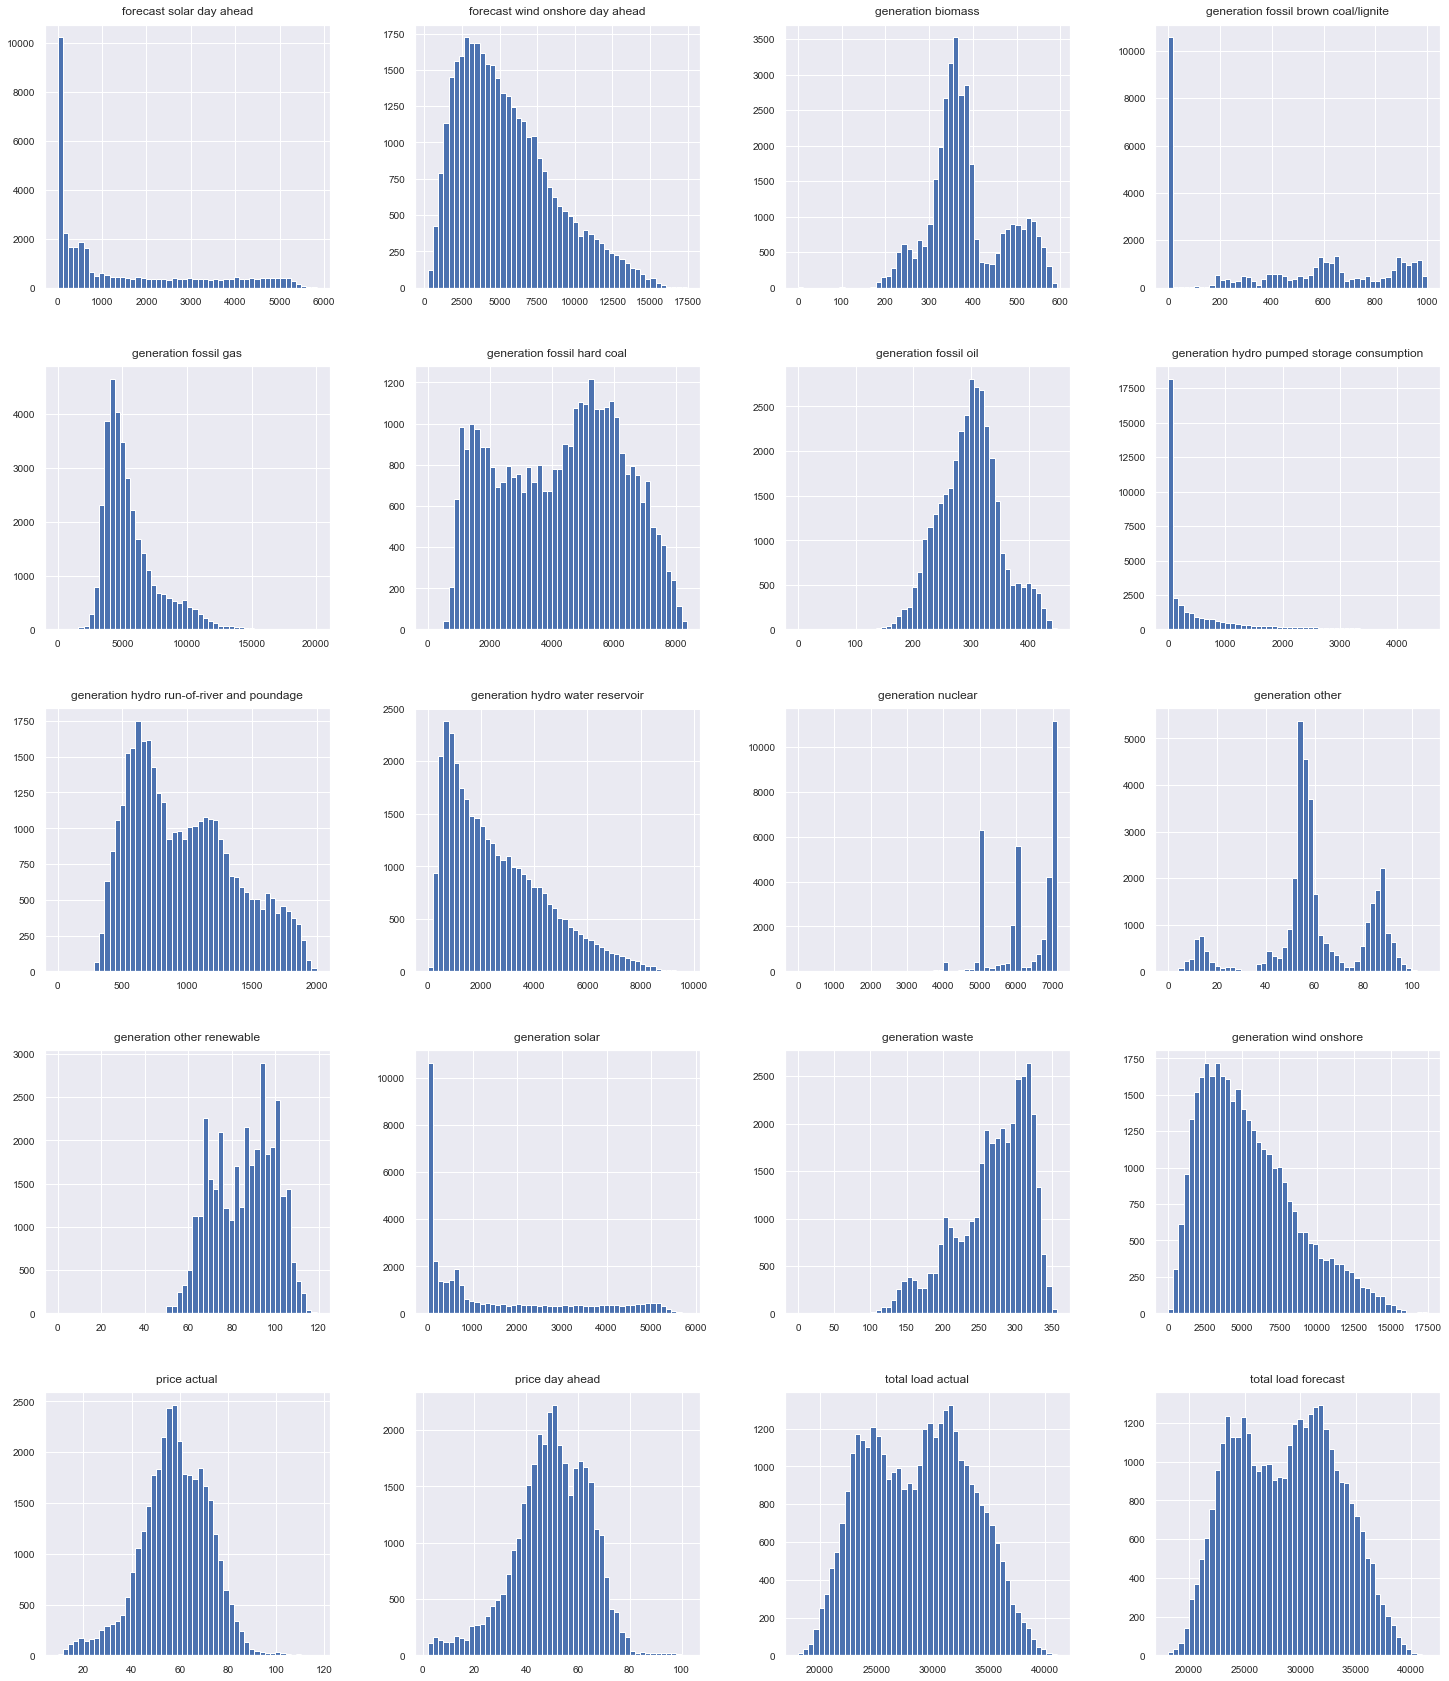

In [620]:
energy.hist(figsize=(25, 30), bins=50, xlabelsize=10, ylabelsize=10)
plt.show()

The Histogram show an anlysis for all the sources of power genration and the limit of each source of genration and we can see the normal operating range of genration for this source 

In [30]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 20 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           35064 non-null  float64
 1   generation fossil brown coal/lignite         35064 non-null  float64
 2   generation fossil gas                        35064 non-null  float64
 3   generation fossil hard coal                  35064 non-null  float64
 4   generation fossil oil                        35064 non-null  float64
 5   generation hydro pumped storage consumption  35064 non-null  float64
 6   generation hydro run-of-river and poundage   35064 non-null  float64
 7   generation hydro water reservoir             35064 non-null  float64
 8   generation nuclear                           35064 non-null  float64
 9   generation other         

### Weather dataset cleaning 

In [31]:
weather.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [32]:
weather.describe().round(1)

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
count,178396.0,178396.0,178396.0,178396.0,178396.0,178396.0,178396.0,178396.0,178396.0,178396.0,178396.0,178396.0
mean,289.6,288.3,291.1,1069.3,68.4,2.5,166.6,0.1,0.0,0.0,25.1,759.8
std,8.0,8.0,8.6,5969.6,21.9,2.1,116.6,0.4,0.0,0.2,30.8,108.7
min,262.2,262.2,262.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0
25%,283.7,282.5,284.6,1013.0,53.0,1.0,55.0,0.0,0.0,0.0,0.0,800.0
50%,289.2,288.2,290.2,1018.0,72.0,2.0,177.0,0.0,0.0,0.0,20.0,800.0
75%,295.2,293.7,297.2,1022.0,87.0,4.0,270.0,0.0,0.0,0.0,40.0,801.0
max,315.6,315.2,321.2,1008371.0,100.0,133.0,360.0,12.0,2.3,21.5,100.0,804.0


In [33]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

First we started to check the values within the dataset to see if there is any outliers as it has direct effect on generation in terms due to the following reasons

1- temperature and Humidity Demand due to air conditioning and heating 

2- temperature and Humidity affects the generating thermal as it affects the cooling process for the equipment and efficiency of the plants 

3- Wind speed affects the wind generation 

4- Rain and clouds have direct effect on generation through solar generation farms.


so first we will look at the max and mi of all the values and see if they make sense or not 

1- For temperature the max is 321 k which is equivalent to 47.85 C which might happen in some rare very summer days

2- For Temperature the low is 262.2 K which is equivalent to -10.95 chick still  make sense to reach this temperature during winter coldest days in northern Spain 

3- Pressure: it seems we have some problems with the pressure max. and min in hPA as it has up normal pressure like 0 and 1008371.0 which cannot happen unless there is a problem in the measurement. Though my knowledge in the domain of the power generation the pressure factor can be neglected from this detail as it very minor to neglected effect so we will drop it from the data 

4- Humidity: has 0 which is very highly unlikely to happen so will cap the humidity at max 90 % and low 35%

5- Wind speed: looking at the wind speed it seems that there are some strange values that is reaching 133 m/s which is impossible the max wind speed recorded in Madrid was 7.8m/s over the last 10 years so we will need to clean this data.

6- we will drop weather_id, weather_main, weather_description, weather_icon as the details in the other columns are enoughto indicate all waether condtions.


In [34]:
# Drop the columns that are not required for the analysis 

weather.drop(columns=['pressure','temp_min','temp_max',
                     'weather_id','weather_main',
                     'weather_description',
                     'weather_icon','rain_1h','rain_3h','snow_3h' ], inplace =True)

In [35]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   dt_iso      178396 non-null  object 
 1   city_name   178396 non-null  object 
 2   temp        178396 non-null  float64
 3   humidity    178396 non-null  int64  
 4   wind_speed  178396 non-null  int64  
 5   wind_deg    178396 non-null  int64  
 6   clouds_all  178396 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 9.5+ MB


In [36]:
# Checking the null values 
weather.isnull().sum()

dt_iso        0
city_name     0
temp          0
humidity      0
wind_speed    0
wind_deg      0
clouds_all    0
dtype: int64

In [37]:
# adjusting the types of data
weather['humidity'] = weather['humidity'].astype(np.float64)
weather['wind_speed'] = weather['wind_speed'].astype(np.float64)
weather['wind_deg'] = weather['wind_deg'].astype(np.float64)
weather['clouds_all'] = weather['clouds_all'].astype(np.float64)

In [38]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   dt_iso      178396 non-null  object 
 1   city_name   178396 non-null  object 
 2   temp        178396 non-null  float64
 3   humidity    178396 non-null  float64
 4   wind_speed  178396 non-null  float64
 5   wind_deg    178396 non-null  float64
 6   clouds_all  178396 non-null  float64
dtypes: float64(5), object(2)
memory usage: 9.5+ MB


In [621]:
# Cleaning the outliers

weather.loc[weather.wind_speed > 20, 'wind_speed'] = np.nan

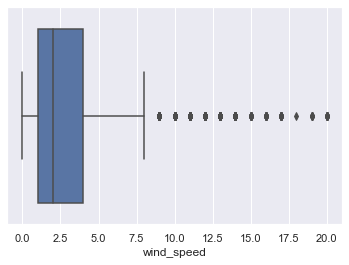

In [40]:
sns.boxplot(x=weather['wind_speed'])
plt.show()

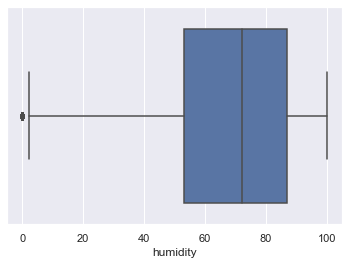

In [41]:
sns.boxplot(x=weather['humidity'])
plt.show()

In [42]:
#Removing all values less than 15 and more than 90 for humidity 
weather.loc[weather.wind_speed > 90, 'humidity'] = np.nan
weather.loc[weather.wind_speed < 15, 'humidity'] = np.nan

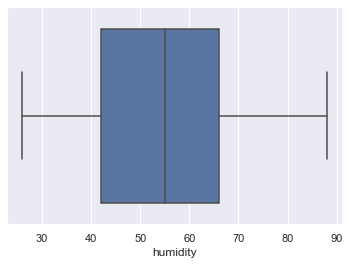

In [43]:
sns.boxplot(x=weather['humidity'])
plt.show()

In [44]:
weather.isnull().sum()

dt_iso             0
city_name          0
temp               0
humidity      178283
wind_speed        31
wind_deg           0
clouds_all         0
dtype: int64

In [45]:
# we will fill the missing values through interpolation
# Fill null values using interpolation with both directions forword and backword

weather.interpolate(method='linear', limit_direction='both', inplace=True, axis=0)

In [46]:
weather.isnull().sum()

dt_iso        0
city_name     0
temp          0
humidity      0
wind_speed    0
wind_deg      0
clouds_all    0
dtype: int64

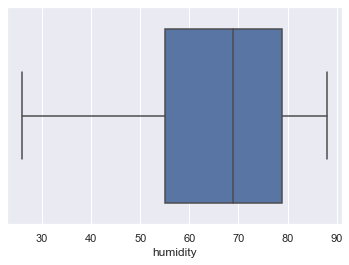

In [47]:
sns.boxplot(x=weather['humidity'])
plt.show()

In [48]:
# we will check the cities in the dataset

cities = weather['city_name'].unique()

print(cities)

['Valencia' 'Madrid' 'Bilbao' ' Barcelona' 'Seville']


In [49]:
#we will split the datasets into sities to do this we need to find out how many rows are for each city 
cities = weather['city_name'].unique()
grouped_weather = weather.groupby('city_name')

for city in cities:
    print('There are {} observations in eather'.format(grouped_weather.get_group('{}'.format(city)).shape[0]), 
          'about city: {}.'.format(city))

There are 35145 observations in eather about city: Valencia.
There are 36267 observations in eather about city: Madrid.
There are 35951 observations in eather about city: Bilbao.
There are 35476 observations in eather about city:  Barcelona.
There are 35557 observations in eather about city: Seville.


Based on the above finiding the number of rows are not equal for all cities so we will have to dig more to find if the dates are for the same range or different ranges also if there is duplicates or not 

In [50]:
# first step is to check for duplicates
temp_weather = weather.duplicated(keep='first').sum()

print('There are {} duplicate rows in weather except first occurrence based on all columns.'.format(temp_weather))

There are 395 duplicate rows in weather except first occurrence based on all columns.


In [51]:
weather = weather.reset_index().drop_duplicates(subset=['dt_iso', 'city_name'], keep='first')

In [52]:
#replacing the name of the time column to match the energy dataset
weather.rename(columns = {'dt_iso':'time'}, inplace = True)

In [53]:
parse_dates=[weather.time]
weather['time'] = pd.to_datetime(weather['time'], utc=True, infer_datetime_format=True)
weather = weather.set_index('time')


In [54]:
weather.drop(columns=['index'], inplace =True)
weather.head()


,city_name,temp,humidity,wind_speed,wind_deg,clouds_all
time,,,,,,
2014-12-31 23:00:00+00:00,Valencia,270.475,26.0,1.0,62.0,0.0
2015-01-01 00:00:00+00:00,Valencia,270.475,26.0,1.0,62.0,0.0
2015-01-01 01:00:00+00:00,Valencia,269.686,26.0,0.0,23.0,0.0
2015-01-01 02:00:00+00:00,Valencia,269.686,26.0,0.0,23.0,0.0
2015-01-01 03:00:00+00:00,Valencia,269.686,26.0,0.0,23.0,0.0


In [55]:
weather_Val= weather[weather['city_name']== "Valencia"]
weather_Mad= weather[weather['city_name']== "Madrid"]
weather_Bil=weather[weather['city_name']== "Bilbao"]
weather_Bar=weather[weather['city_name']== " Barcelona"]
weather_Sev=weather[weather['city_name']== "Seville"]

In [56]:
df1 = weather_Val.copy()
df2 = weather_Mad.copy()
df3 = weather_Bil.copy()
df4 = weather_Bar.copy()
df5 = weather_Sev.copy()

In [57]:
df1.drop(columns=['city_name'], inplace = True)
df2.drop(columns=['city_name'], inplace =True)
df3.drop(columns=['city_name'], inplace =True)
df4.drop(columns=['city_name'], inplace =True)
df5.drop(columns=['city_name'], inplace =True)

In [58]:
df1 = df1.add_suffix('_Val')
df2 = df2.add_suffix('_Mad')
df3 = df3.add_suffix('_Bil')
df4 = df4.add_suffix('_Bar')
df5 = df5.add_suffix('_Sev')


Now the 5 dataframes for the weather are ready to be merged with the enrgy dataframe

In [59]:
dfs = pd.merge(df1,df2, left_index=True, right_index=True )
dfs = pd.merge(dfs,df3, left_index=True, right_index=True )
dfs = pd.merge(dfs,df4, left_index=True, right_index=True )
dfs = pd.merge(dfs,df5, left_index=True, right_index=True )
df_energy = pd.merge(energy,dfs, left_index=True, right_index=True )

In [60]:
df_energy.isnull().sum()

generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind onshore                        0
forecast solar day ahead                       0
forecast wind onshore day ahead                0
total load forecast                            0
total load actual                              0
price day ahead                                0
price actual                                   0
temp_Val            

### Oil Price 

In [628]:
oil_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3289 entries, 0 to 3288
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    3289 non-null   object 
 1    value  3268 non-null   float64
dtypes: float64(1), object(1)
memory usage: 51.5+ KB


In [629]:
# Cleaning  Oil prices  
oil_price.rename(columns = {'date':'time'}, inplace = True)
oil_price.rename(columns = {' value':'oli_price'}, inplace = True)
oil_price['time'] = pd.to_datetime(oil_price['time'], utc=True, infer_datetime_format=True)
oil_price = oil_price.set_index('time')


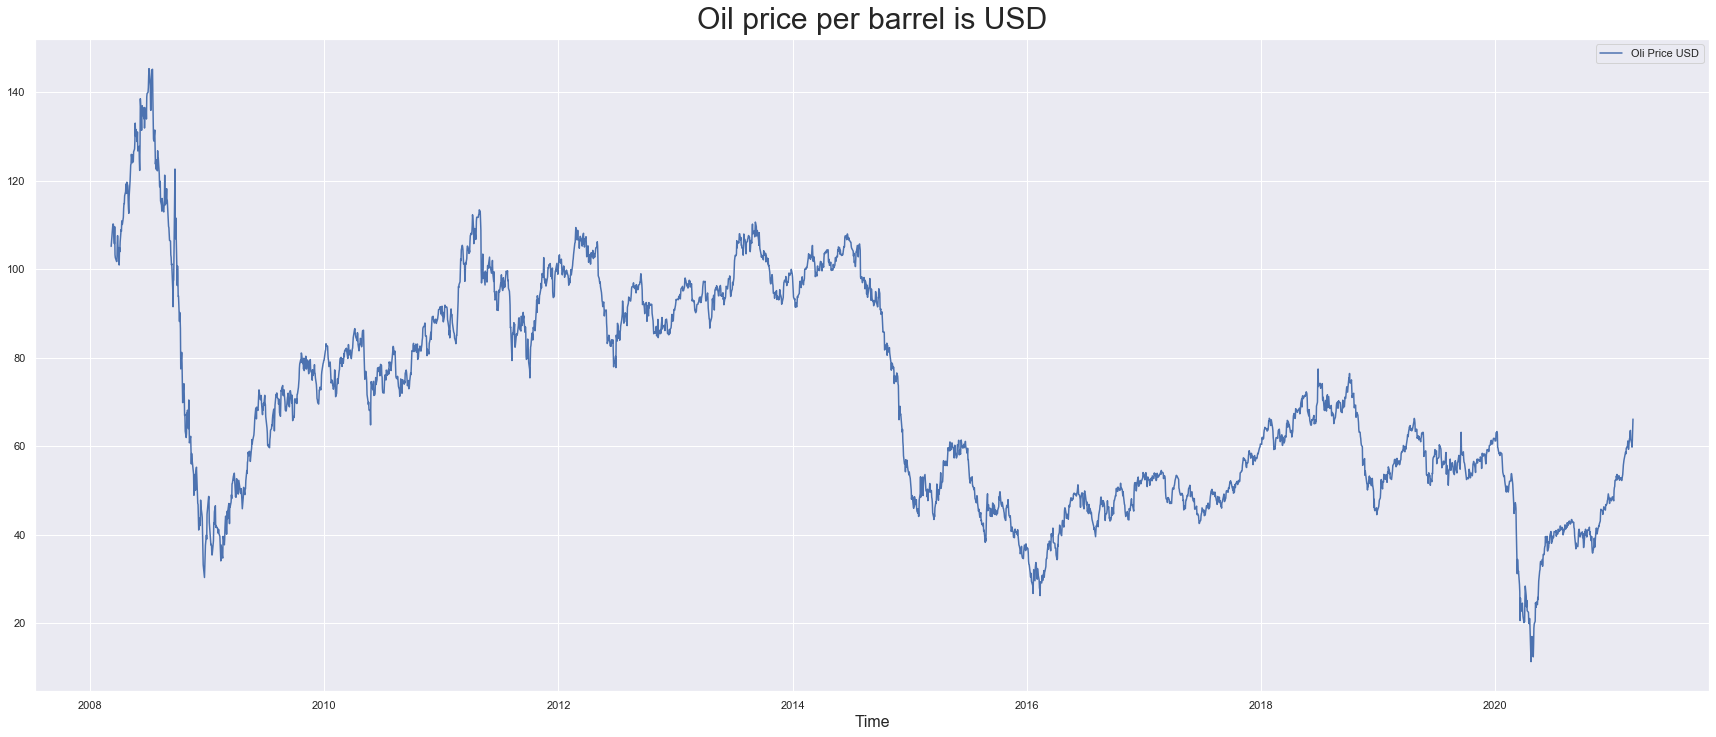

In [633]:
ax = plot_series(df=oil_price, column=['oli_price',], 
                 title='Oil price per barrel is USD', end=24*7*30)
ax.legend((['Oli Price USD']))
plt.show()

### Natural Gas Prices

In [63]:
ntrl_gas_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3311 entries, 0 to 3310
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    3311 non-null   object 
 1    value  3290 non-null   float64
dtypes: float64(1), object(1)
memory usage: 51.9+ KB


In [641]:
ntrl_gas_price.rename(columns = {'date':'time'}, inplace = True)
ntrl_gas_price.rename(columns = {' value':'NG_price'}, inplace = True)
ntrl_gas_price['time'] = pd.to_datetime(ntrl_gas_price['time'], utc=True, infer_datetime_format=True)
ntrl_gas_price = ntrl_gas_price.set_index('time')

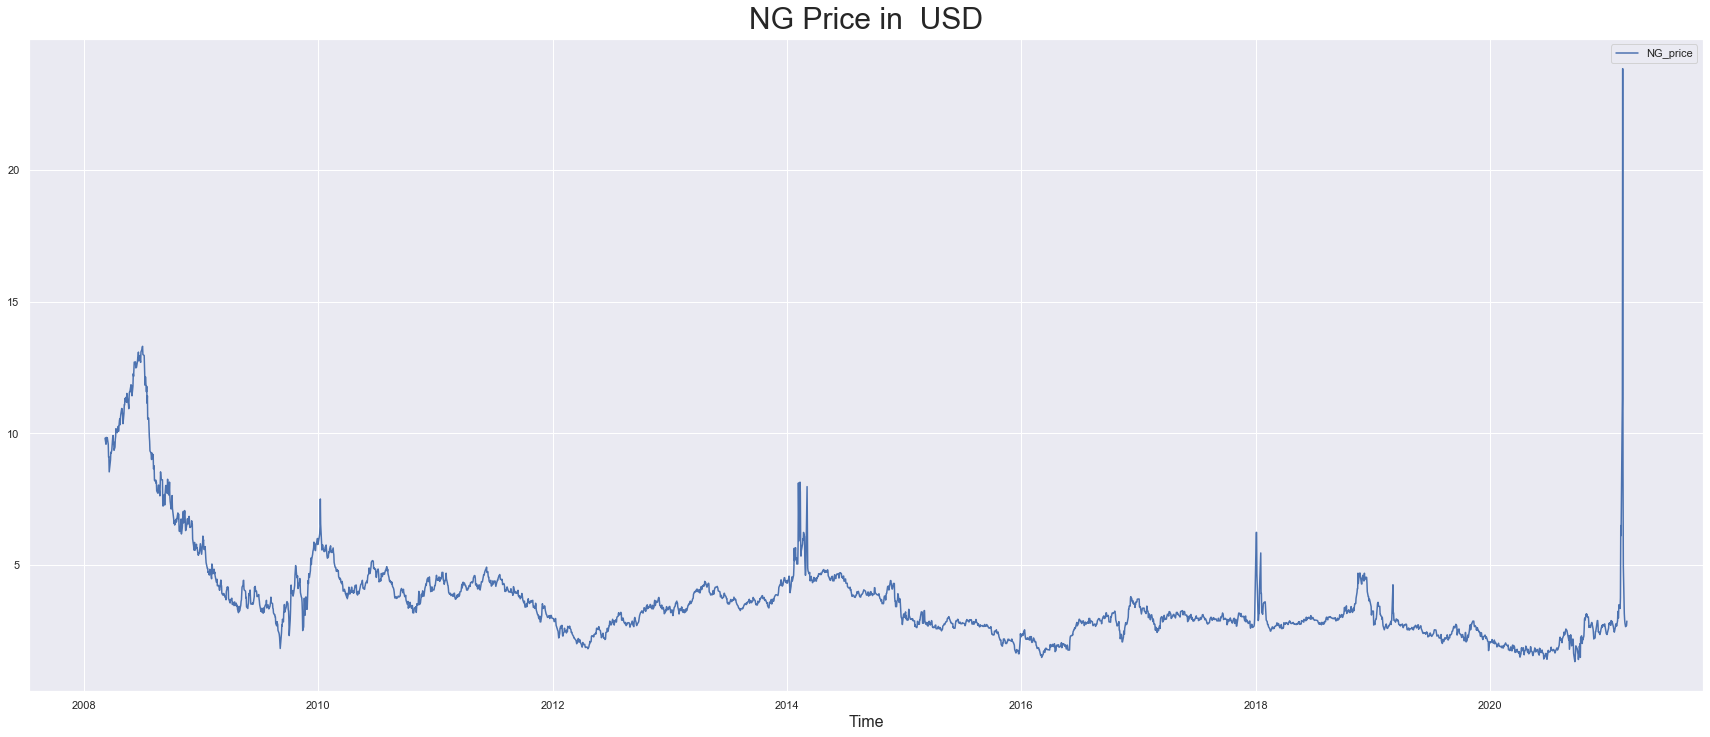

In [642]:
ax = plot_series(df=ntrl_gas_price, column=['NG_price',], 
                 title='NG Price in  USD', end=24*7*30)
ax.legend((['NG_price']))
plt.show()

### Coal prices 

Since the Data set of the Coal is monthly average will have to fill the hourly values with the same monthly average

In [644]:
coal_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time        49 non-null     object 
 1   coal_price  49 non-null     float64
dtypes: float64(1), object(1)
memory usage: 912.0+ bytes


In [645]:
coal_price['time'] = pd.to_datetime(coal_price['time'], utc=True, infer_datetime_format=True)
coal_price = coal_price.set_index('time')

In [646]:
rng = pd.date_range(coal_price.index.min(), coal_price.index.max() + pd.Timedelta(23, 'H'), freq='H')
coal_price = coal_price.reindex(rng, method='ffill')

In [647]:
coal_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35088 entries, 2015-01-01 00:00:00+00:00 to 2019-01-01 23:00:00+00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coal_price  35088 non-null  float64
dtypes: float64(1)
memory usage: 548.2 KB


In [648]:
coal_price = coal_price.loc['2014-12-31 23:00:00+00:00':'2018-12-31 23:00:00+00:00'].copy()

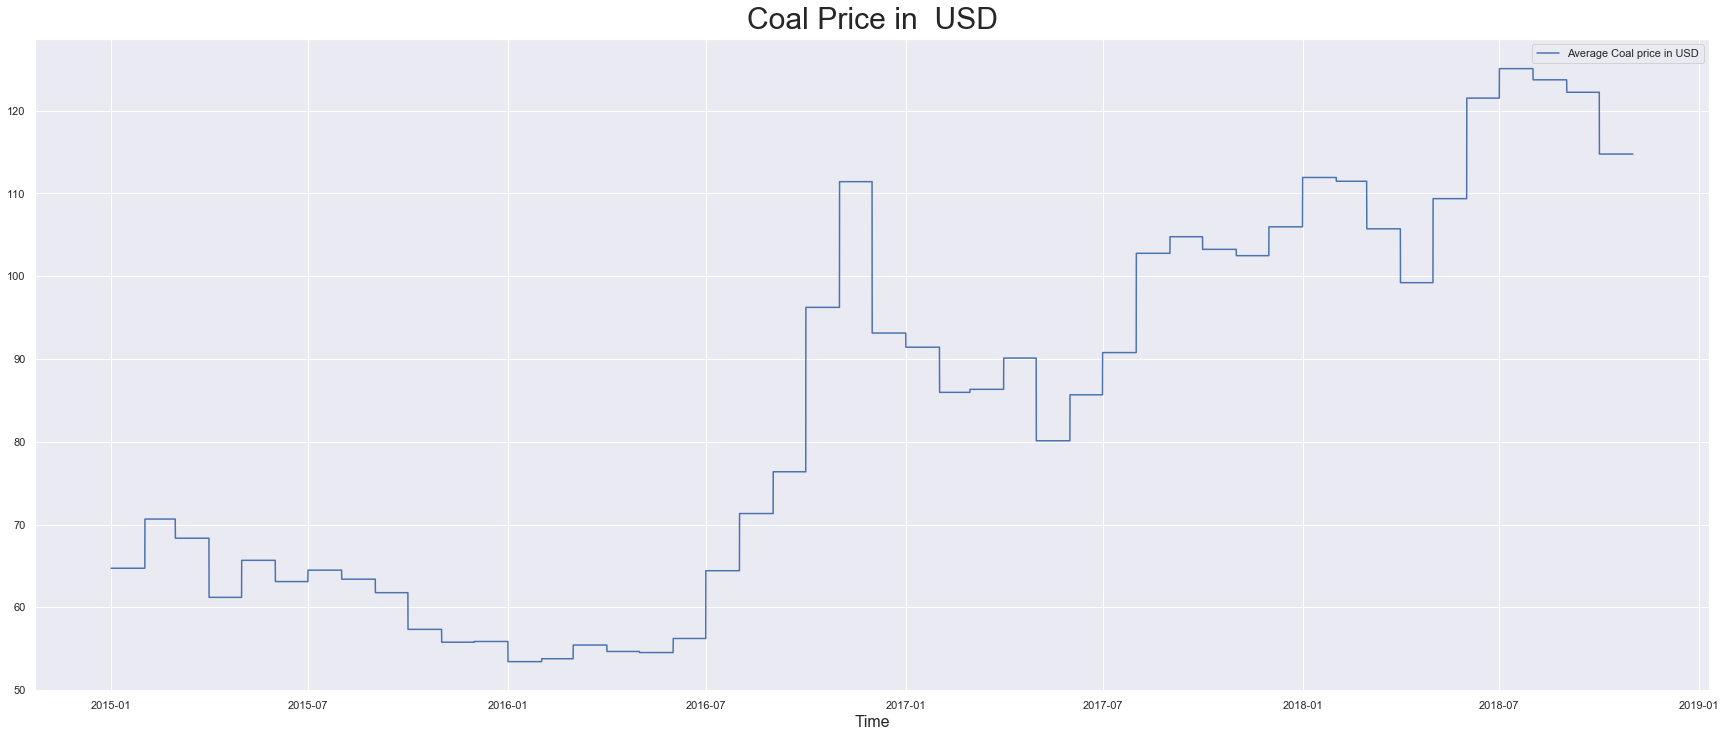

In [653]:
ax = plot_series(df=coal_price, column=['coal_price',], 
                 title='Coal Price in  USD', end=24*7*200)
ax.legend((['Average Coal price in USD']))
plt.show()

### Exchange rate of USD and EURO

In [654]:
xchg_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5825 entries, 0 to 5824
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    5825 non-null   object 
 1    value  5825 non-null   float64
dtypes: float64(1), object(1)
memory usage: 91.1+ KB


In [655]:
xchg_rate.rename(columns = {'date':'time'}, inplace = True)
xchg_rate.rename(columns = {' value':'XG_rate'}, inplace = True)
xchg_rate['time'] = pd.to_datetime(xchg_rate['time'], utc=True, infer_datetime_format=True)
xchg_rate = xchg_rate.set_index('time')

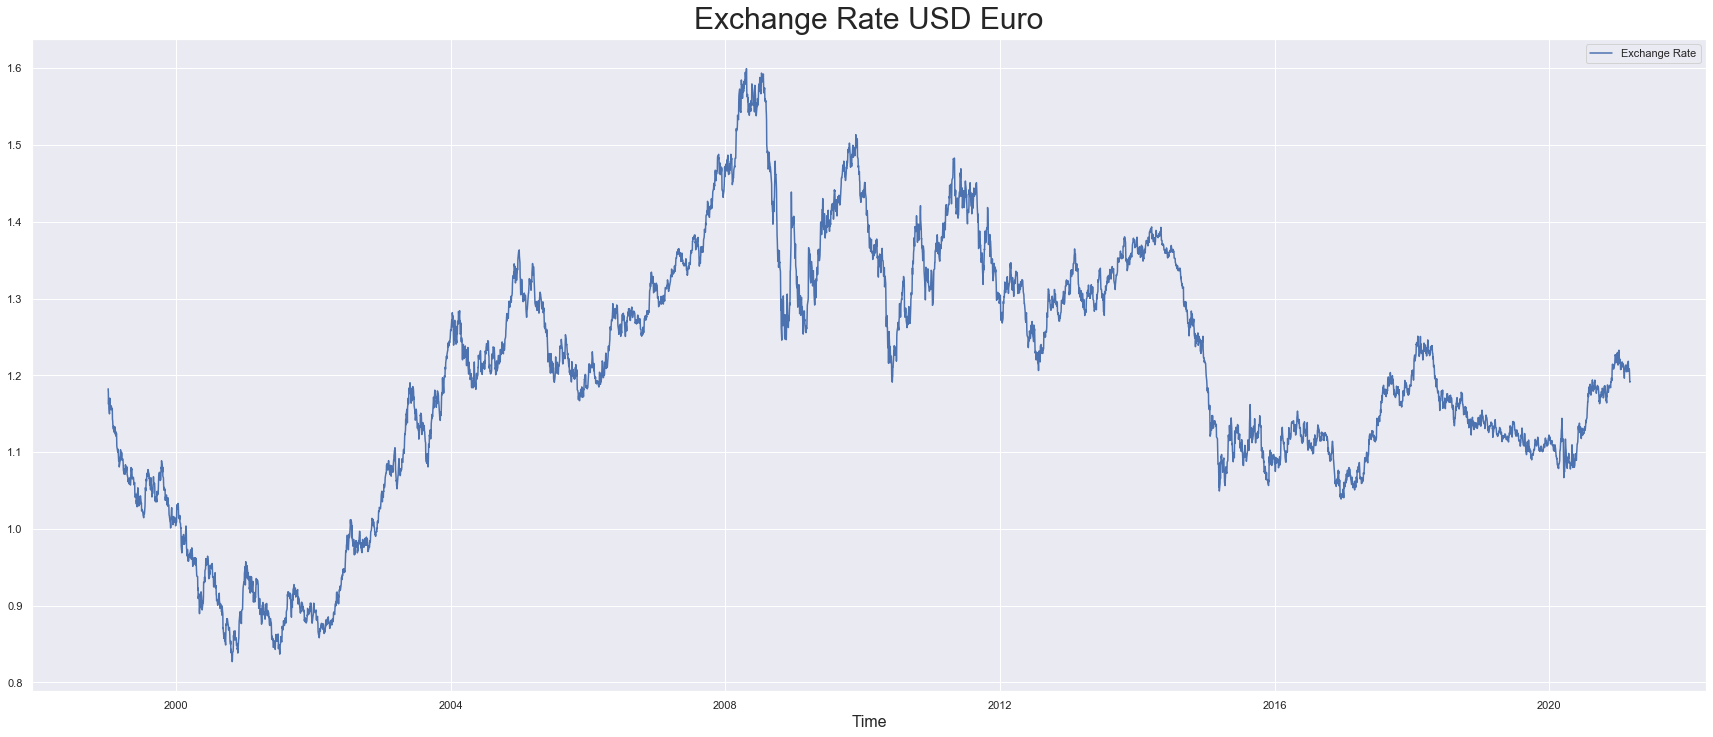

In [657]:
ax = plot_series(df=xchg_rate, column=['XG_rate',], 
                 title='Exchange Rate USD Euro', end=24*7*200)
ax.legend((['Exchange Rate']))
plt.show()

### Combining the Datasets

In [72]:
df_energy

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,...,temp_Bar,humidity_Bar,wind_speed_Bar,wind_deg_Bar,clouds_all_Bar,temp_Sev,humidity_Sev,wind_speed_Sev,wind_deg_Sev,clouds_all_Sev
time,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,...,281.625,79.540056,7.0,58.0,0.0,273.375,67.127653,1.0,21.0,0.0
2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,...,281.625,79.540444,7.0,58.0,0.0,273.375,67.126432,1.0,21.0,0.0
2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,...,281.286,79.540833,7.0,48.0,0.0,274.086,67.125210,3.0,27.0,0.0
2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,...,281.286,79.541221,7.0,48.0,0.0,274.086,67.123988,3.0,27.0,0.0
2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,...,281.286,79.541609,7.0,48.0,0.0,274.086,67.122767,3.0,27.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 18:00:00+00:00,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,63.0,...,284.130,67.133761,1.0,250.0,0.0,287.760,55.000000,3.0,30.0,0.0
2018-12-31 19:00:00+00:00,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,62.0,...,282.640,67.132539,3.0,270.0,0.0,285.760,55.000000,3.0,30.0,0.0
2018-12-31 20:00:00+00:00,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,61.0,...,282.140,67.131318,4.0,300.0,0.0,285.150,55.000000,4.0,50.0,0.0


In [180]:
df_price = pd.merge(oil_price,ntrl_gas_price, left_index=True, right_index=True )

In [181]:
df_price = pd.merge(df_price,xchg_rate, left_index=True, right_index=True )

In [182]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3264 entries, 2008-03-07 00:00:00+00:00 to 2021-03-06 00:00:00+00:00
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   oli_price  3263 non-null   float64
 1   NG_price   3260 non-null   float64
 2   XG_rate    3264 non-null   float64
dtypes: float64(3)
memory usage: 102.0 KB


We will copy the range of the data to match  energy dataset

In [183]:
df_price_fn = df_price.loc['2014-12-31':'2019-01-03'].copy()

In [184]:
df_price_fn

,oli_price,NG_price,XG_rate
time,,,
2014-12-31 00:00:00+00:00,53.45,3.14,1.2097
2015-01-02 00:00:00+00:00,52.72,3.01,1.2000
2015-01-05 00:00:00+00:00,50.05,3.22,1.1932
2015-01-06 00:00:00+00:00,47.98,2.98,1.1891
2015-01-07 00:00:00+00:00,48.69,3.08,1.1839
...,...,...,...
2018-12-26 00:00:00+00:00,46.04,3.42,1.1356
2018-12-27 00:00:00+00:00,44.48,3.10,1.1429
2018-12-28 00:00:00+00:00,45.15,3.25,1.1438


In [185]:
rng = pd.date_range(df_price_fn.index.min(), df_price_fn.index.max() + pd.Timedelta(23, 'H'), freq='H')
df_price_fn2 = df_price_fn.reindex(rng, method='ffill')


In [186]:
df_price_fn2

,oli_price,NG_price,XG_rate
2014-12-31 00:00:00+00:00,53.45,3.14,1.2097
2014-12-31 01:00:00+00:00,53.45,3.14,1.2097
2014-12-31 02:00:00+00:00,53.45,3.14,1.2097
2014-12-31 03:00:00+00:00,53.45,3.14,1.2097
2014-12-31 04:00:00+00:00,53.45,3.14,1.2097
...,...,...,...
2019-01-03 19:00:00+00:00,46.92,2.72,1.1394
2019-01-03 20:00:00+00:00,46.92,2.72,1.1394
2019-01-03 21:00:00+00:00,46.92,2.72,1.1394
2019-01-03 22:00:00+00:00,46.92,2.72,1.1394


In [187]:
df_price_fn3 = df_price_fn2.loc['2014-12-31 23:00:00+00:00':'2018-12-31 23:00:00+00:00'].copy()

In [188]:
df_price_fn4 = pd.merge(df_price_fn3,coal_price, left_index=True, right_index=True )

In [189]:
df_price_fn4

,oli_price,NG_price,XG_rate,coal_price
2015-01-01 00:00:00+00:00,53.45,3.14,1.2097,64.716327
2015-01-01 01:00:00+00:00,53.45,3.14,1.2097,64.716327
2015-01-01 02:00:00+00:00,53.45,3.14,1.2097,64.716327
2015-01-01 03:00:00+00:00,53.45,3.14,1.2097,64.716327
2015-01-01 04:00:00+00:00,53.45,3.14,1.2097,64.716327
...,...,...,...,...
2018-12-31 19:00:00+00:00,45.15,3.25,1.1438,106.143609
2018-12-31 20:00:00+00:00,45.15,3.25,1.1438,106.143609
2018-12-31 21:00:00+00:00,45.15,3.25,1.1438,106.143609
2018-12-31 22:00:00+00:00,45.15,3.25,1.1438,106.143609


In [190]:
df_energy_fin = pd.merge(df_energy,df_price_fn4, left_index=True, right_index=True )

In [191]:
df_energy_fin

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,...,clouds_all_Bar,temp_Sev,humidity_Sev,wind_speed_Sev,wind_deg_Sev,clouds_all_Sev,oli_price,NG_price,XG_rate,coal_price
2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,...,0.0,273.375,67.126432,1.0,21.0,0.0,53.45,3.14,1.2097,64.716327
2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,...,0.0,274.086,67.125210,3.0,27.0,0.0,53.45,3.14,1.2097,64.716327
2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,...,0.0,274.086,67.123988,3.0,27.0,0.0,53.45,3.14,1.2097,64.716327
2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,...,0.0,274.086,67.122767,3.0,27.0,0.0,53.45,3.14,1.2097,64.716327
2015-01-01 04:00:00+00:00,410.0,178.0,4038.0,3590.0,156.0,2109.0,952.0,743.0,7098.0,43.0,...,0.0,274.592,67.121545,4.0,57.0,0.0,53.45,3.14,1.2097,64.716327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 18:00:00+00:00,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,63.0,...,0.0,287.760,55.000000,3.0,30.0,0.0,45.15,3.25,1.1438,106.143609
2018-12-31 19:00:00+00:00,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,62.0,...,0.0,285.760,55.000000,3.0,30.0,0.0,45.15,3.25,1.1438,106.143609
2018-12-31 20:00:00+00:00,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,61.0,...,0.0,285.150,55.000000,4.0,50.0,0.0,45.15,3.25,1.1438,106.143609
2018-12-31 21:00:00+00:00,293.0,0.0,6562.0,2293.0,163.0,108.0,1128.0,2068.0,6075.0,61.0,...,0.0,284.150,55.000000,4.0,60.0,0.0,45.15,3.25,1.1438,106.143609


In [192]:
df_energy_fin.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35063 entries, 2015-01-01 00:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 49 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           35063 non-null  float64
 1   generation fossil brown coal/lignite         35063 non-null  float64
 2   generation fossil gas                        35063 non-null  float64
 3   generation fossil hard coal                  35063 non-null  float64
 4   generation fossil oil                        35063 non-null  float64
 5   generation hydro pumped storage consumption  35063 non-null  float64
 6   generation hydro run-of-river and poundage   35063 non-null  float64
 7   generation hydro water reservoir             35063 non-null  float64
 8   generation nuclear                           35063 non-null  float64
 9   generation other         

In [193]:
df_energy_fin.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,...,clouds_all_Bar,temp_Sev,humidity_Sev,wind_speed_Sev,wind_deg_Sev,clouds_all_Sev,oli_price,NG_price,XG_rate,coal_price
count,35063.000000,35063.000000,35063.000000,35063.000000,35063.000000,35063.000000,35063.000000,35063.000000,35063.000000,35063.000000,...,35063.000000,35063.000000,35063.000000,35063.000000,35063.000000,35063.000000,35063.000000,35063.000000,35063.000000,35063.000000
mean,383.529533,448.097967,5622.722856,4256.515173,298.346305,475.571657,972.199655,2605.554274,6263.459687,60.226521,...,22.715341,293.167106,56.709694,2.482760,151.889542,14.165474,51.941631,2.821767,1.132108,85.042032
std,85.346810,354.622756,2201.538451,1962.014599,52.515628,792.321301,400.717797,1835.197370,840.272553,20.238871,...,27.328563,8.081899,3.305923,1.868513,104.327901,26.169960,10.114652,0.529946,0.047399,23.077124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,271.050000,55.000000,0.000000,0.000000,0.000000,26.190000,1.490000,1.038800,53.428929
25%,333.000000,0.000000,4126.000000,2527.000000,263.000000,0.000000,637.000000,1078.000000,5759.000000,53.000000,...,0.000000,287.330000,55.000000,1.000000,50.000000,0.000000,45.690000,2.630000,1.097700,63.393214
50%,367.000000,509.000000,4970.000000,4475.000000,300.000000,68.000000,906.000000,2165.000000,6564.000000,57.000000,...,20.000000,292.440000,55.000000,2.000000,175.000000,0.000000,49.900000,2.850000,1.127000,86.333851
75%,433.000000,757.000000,6429.000000,5839.000000,330.000000,616.000000,1250.000000,3758.000000,7025.000000,80.000000,...,36.000000,298.880000,56.352878,3.000000,230.000000,20.000000,59.110000,3.020000,1.166000,105.728061
max,592.000000,999.000000,20034.000000,8359.000000,449.000000,4523.000000,2000.000000,9728.000000,7117.000000,106.000000,...,100.000000,315.600000,67.126432,15.000000,360.000000,100.000000,77.410000,6.240000,1.251000,125.085877


In [194]:
print(df_energy_fin.isnull().sum())

generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind onshore                        0
forecast solar day ahead                       0
forecast wind onshore day ahead                0
total load forecast                            0
total load actual                              0
price day ahead                                0
price actual                                   0
temp_Val            

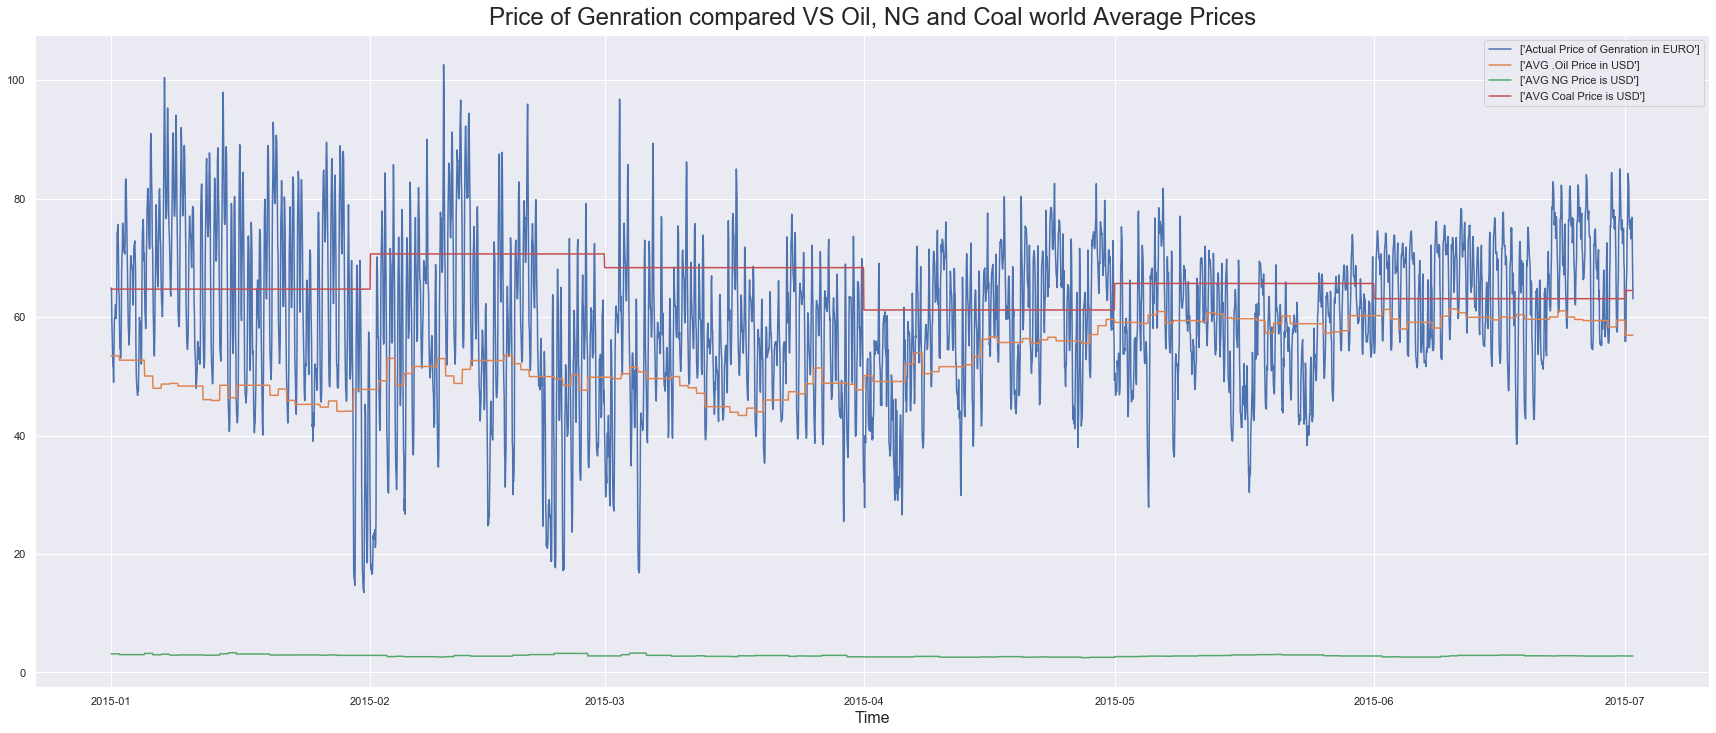

In [195]:
# Plting the Price of the MWH against the prices of the fuels to see if we can spot any relation just by looking to the plot
ax = plot_series(df=df_energy_fin, column=['price actual','oli_price','NG_price','coal_price'], 
                 title='Price of Genration compared VS Oil, NG and Coal world Average Prices', end=24*7*26)
ax.legend((['Actual Price of Genration in EURO'], ['AVG .Oil Price in USD'],['AVG NG Price is USD'], ['AVG Coal Price is USD']))
plt.show()

## Predection using Univariate ARIMA model for the load  


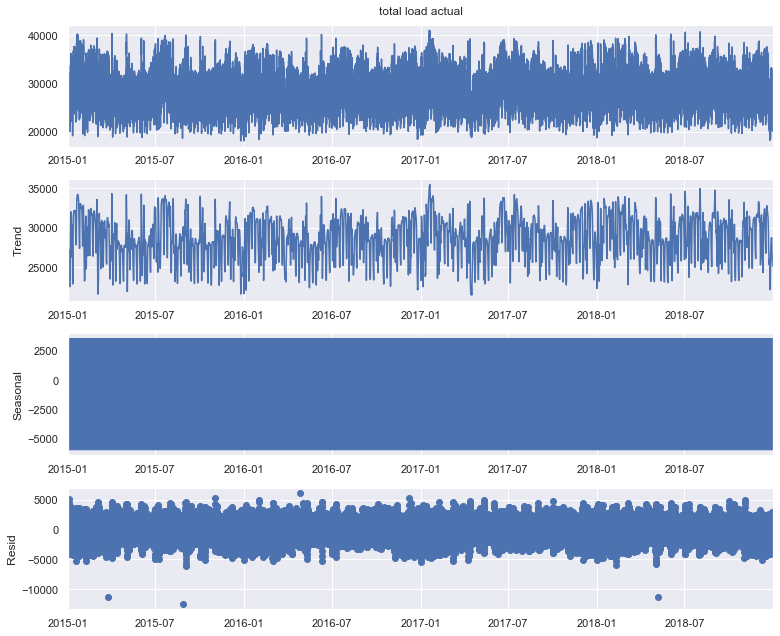

<Figure size 792x648 with 0 Axes>

In [682]:
#Looking at the decompostion plot
rcParams['figure.figsize'] = 11, 9
decomp = seasonal_decompose(df_energy_fin['total load actual'])
fig = decomp.plot()
fig = plt.figure()
plt.show()


From the above Graphs it seems tha there is no increasing or deacresing trend in the load and the data seems to be a stationary 

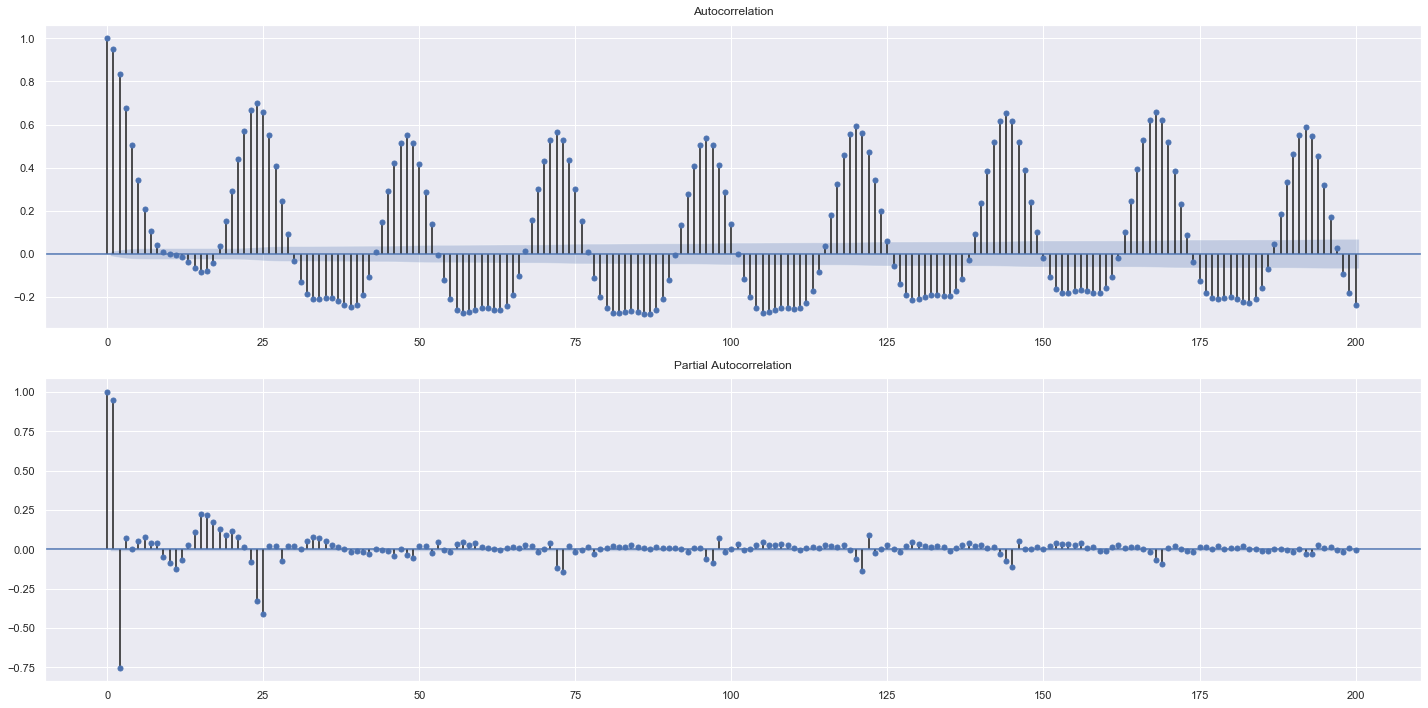

In [687]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20, 10))
plot_acf(df_energy_fin['total load actual'], lags=200, ax=ax1)
plot_pacf(df_energy_fin['total load actual'], lags=200, ax=ax2)
plt.tight_layout()
plt.show()


ACF and PACF for the Actual load , respectively indicate that there is a high autocorrelation between the values in an oscillating manne.

In [329]:
df_load_forcast = pd.DataFrame(df_energy_fin)
df_load_forcast.drop(columns=['total load forecast'], inplace = True)

In [202]:
df_load_forcast.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35063 entries, 2015-01-01 00:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 48 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           35063 non-null  float64
 1   generation fossil brown coal/lignite         35063 non-null  float64
 2   generation fossil gas                        35063 non-null  float64
 3   generation fossil hard coal                  35063 non-null  float64
 4   generation fossil oil                        35063 non-null  float64
 5   generation hydro pumped storage consumption  35063 non-null  float64
 6   generation hydro run-of-river and poundage   35063 non-null  float64
 7   generation hydro water reservoir             35063 non-null  float64
 8   generation nuclear                           35063 non-null  float64
 9   generation other         

In [494]:
df_load_arima  = pd.DataFrame(df_load_forcast['total load actual'])
y = pd.DataFrame(df_load_arima['total load actual'])


total load actual    0
dtype: int64

In [442]:
# Using AD Fuller test to check for stationary  data
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [448]:
adf_test(y['total load actual'])

1. ADF :  -21.418561804776697
2. P-Value :  0.0
3. Num Of Lags :  52
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 35010
5. Critical Values :
	 1% :  -3.430536797472945
	 5% :  -2.8616225598677394
	 10% :  -2.5668139440226856


As P is 0 then the data set is stationary and no need to apply the differencing on it 

In [450]:
#Trying to find the lowes  AIC for the pdq values of the ARIMA model so first we will try the Auto Arima method
from pmdarima import auto_arima
stepwise_fit = auto_arima(y['total load actual'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=578763.360, Time=89.74 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=608930.956, Time=1.71 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=584632.091, Time=4.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=590377.152, Time=19.53 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=608928.956, Time=1.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=583251.906, Time=15.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=578852.653, Time=59.02 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=578764.747, Time=99.47 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=578758.573, Time=95.10 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=583084.316, Time=23.34 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=578791.046, Time=92.28 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=577432.855, Time=102.54 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=81.73 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=119.75 sec
 ARIMA

In [445]:
#Then we will try t compute the PDQ throgh testing the the data for the lowes AIC
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))

In [446]:
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [447]:
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [455]:
warnings.filterwarnings("ignore")
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False, freq= 'H')

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:820178.6805117446
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:800664.6535651962
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:715204.2845748094
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:685838.9985359984
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:714783.1217399709
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:695502.918763745
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:669241.8416563898
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:659910.4944190428
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:794021.0355602893
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:788798.2699052686
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:687589.1901942658
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:645672.3519714368
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:785227.1772129472
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:784938.806365282
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:629692.0473348373
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:621354.6390478195
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:608911.2584422461
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:608532.0047119465
ARIMA(0, 1, 

The best lowes AIC is 568623.216 from PDQ (1,1,1) (1,1,1,12)

### ARIMA Model Fitting

In [457]:
#Fit the ARIMA model
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])  

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4329      0.008     57.062      0.000       0.418       0.448
ma.L1         -0.0168      0.008     -2.225      0.026      -0.032      -0.002
ar.S.L12      -0.6922      0.002   -334.954      0.000      -0.696      -0.688
ma.S.L12      -0.3594      0.003   -121.847      0.000      -0.365      -0.354
sigma2      6.543e+05   1483.185    441.138      0.000    6.51e+05    6.57e+05


In [458]:
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                  total load actual   No. Observations:                35063
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood             -284306.608
Date:                            Mon, 08 Mar 2021   AIC                         568623.216
Time:                                    22:45:36   BIC                         568665.537
Sample:                                01-01-2015   HQIC                        568636.696
                                     - 12-31-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4329      0.008     57.062      0.000       0.418       0.448
ma.L1         -0.0168      0.008   

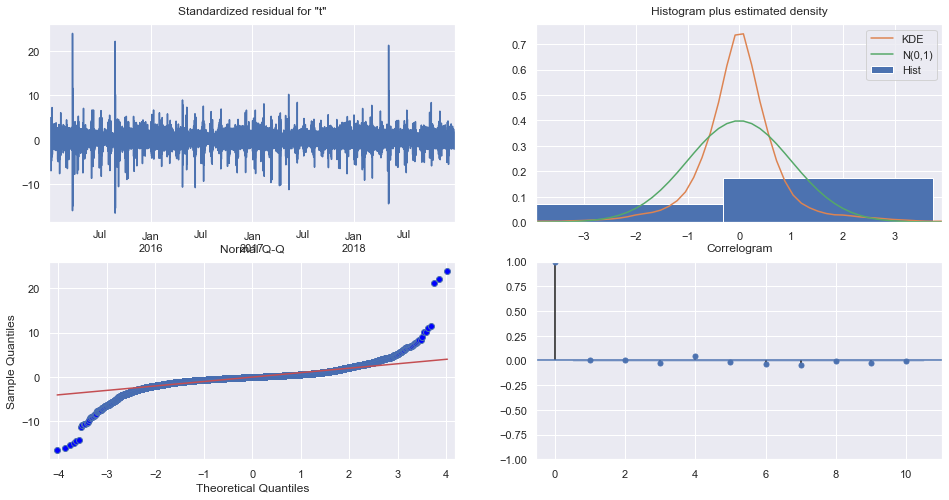

In [479]:
#Running model diagnostic to investigate unusual behaviour
results.plot_diagnostics(figsize=(16, 8))
plt.show()

So how to interpret the plot diagnostics?

Top left: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

Top Right: The density plot suggest normal distribution with mean zero.

Bottom left: The middle values of the sample are close to what we would expect from normally distributed data, as it follows the straight line from the diagram closely.However, it seems the underlying data distribution presents extreme values more often than a normal one, that's why you see the points going under the line for big negative values and over it for big positive ones.

Bottom Right: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model.

Those observations lead us to conclude that our model produces a satisfactory fit that could help us understand our time series data and forecast future values.

#### Predection 

In [490]:
pred = results.get_prediction(start=pd.to_datetime('2018-12-29 01:00:00+00:00'), dynamic=False)
pred_ci = pred.conf_int()

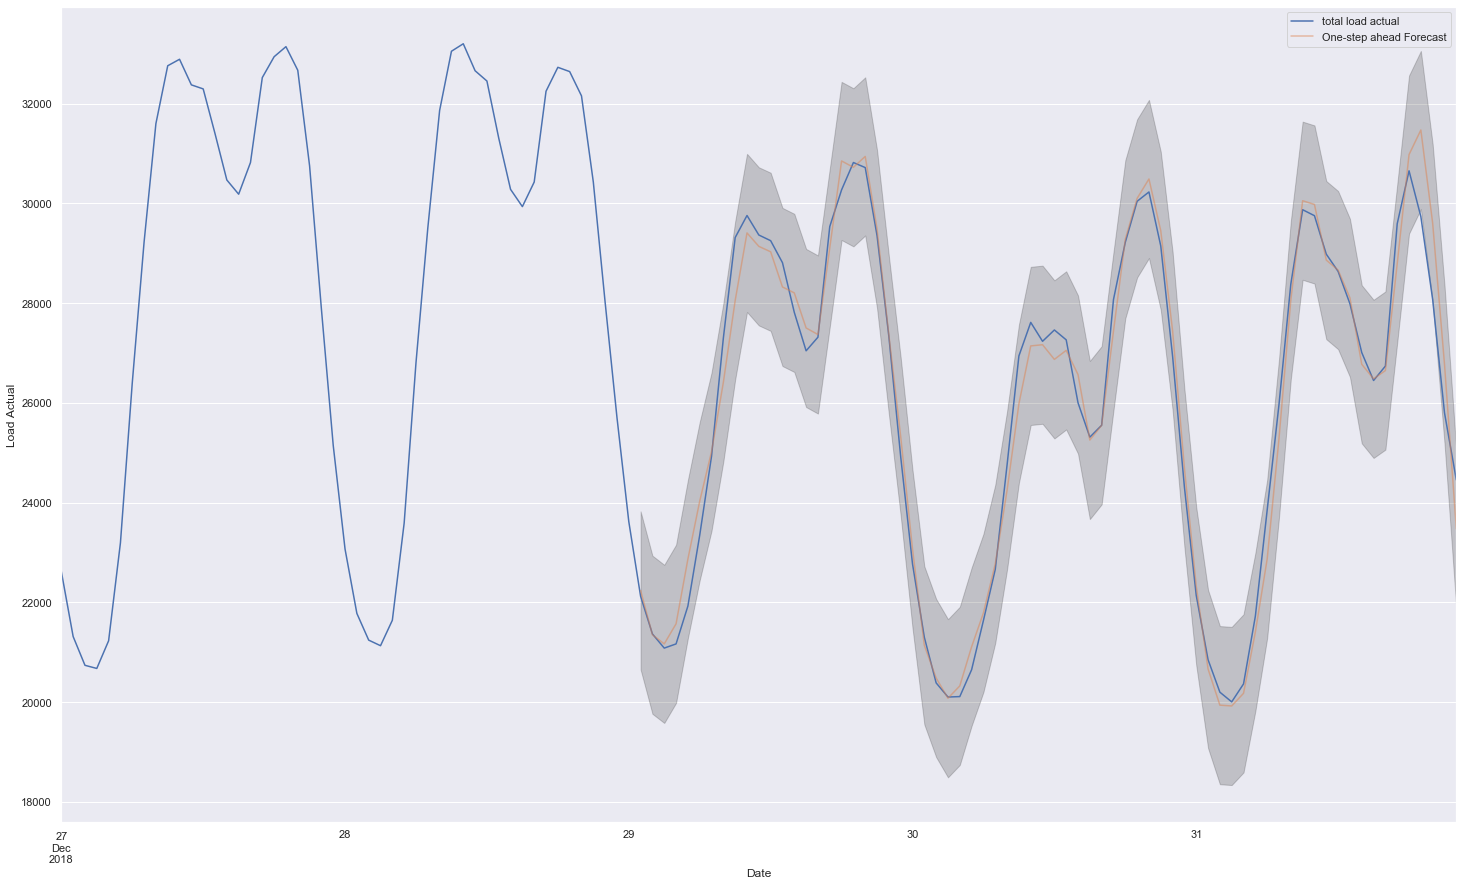

In [491]:
ax = y['2018-12-27 00:00:00+00:00':].plot(label='Actual Load')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.5, figsize=(25, 15))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Load Actual')
plt.legend()
plt.show()

In [513]:
y_forecasted = pred.predicted_mean
y_truth = y['2018-12-29 0:00:00+00:00':]

# Compute the mean square error
mse = ((y_forecasted - y_truth['total load actual']) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 271776.81


In [476]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2018-12-29 01:00:00+00:00'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

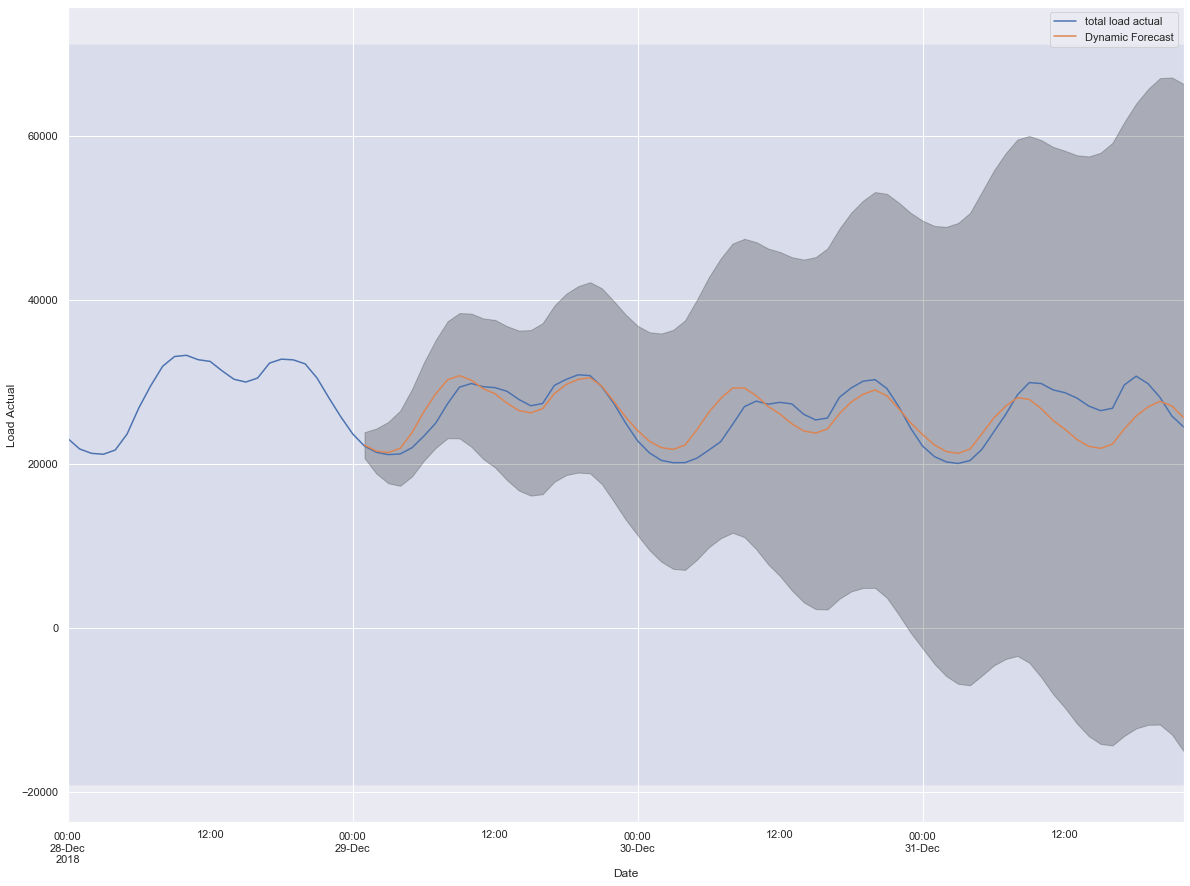

In [477]:
ax = y['2018-12-28 00:00:00+00:00':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2017-12-30 00:00:00+00:00'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Load Actual')

plt.legend()
plt.show()

In [517]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2018-12-29 01:00:00+00:00': ]




The Mean Squared Error of our forecasts is 5568514.6


In [516]:
mse = mean_squared_error(y_truth, y_forecasted)
print('MSE: '+str(mse))
mae = mean_absolute_error(y_truth, y_forecasted)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y_truth, y_forecasted))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(y_forecasted - y_truth['total load actual'])/np.abs(y_truth['total load actual']))
print('MAPE: '+str(mape))

MSE: 5568514.601035193
MAE: 1842.9796334341083
RMSE: 2359.7700313876335
MAPE: 0.07207225388458076


## Forcasting the Cost of the MWH with Tensorflow LSTM

In the following section we will explore the full dataset and the target variable whi is the cost of the MW through the following steps 

1- Finding the coorelations to the target variable 

2- Understaing the features and selecting what will be included in the mdoel 

In [146]:
# Testing the Price of MW with ADF 
y = df_energy_fin['price actual']
adf_test = adfuller(y, regression='c')
print('ADF Statistic: {:.6f}\np-value: {:.6f}\n#Lags used: {}'
      .format(adf_test[0], adf_test[1], adf_test[2]))
for key, value in adf_test[4].items():
    print('Critical Value ({}): {:.6f}'.format(key, value))

ADF Statistic: -9.148003
p-value: 0.000000
#Lags used: 50
Critical Value (1%): -3.430537
Critical Value (5%): -2.861623
Critical Value (10%): -2.566814


Since the P value is 0 the dataset is sattionary 

In [147]:
# Find the correlations between the energy price and the rest of the features

correlations = df_energy_fin.corr(method='pearson')
print(correlations['price actual'].sort_values(ascending=False).to_string())

price actual                                   1.000000
price day ahead                                0.732158
generation fossil hard coal                    0.465635
generation fossil gas                          0.461460
total load forecast                            0.435876
total load actual                              0.435269
oli_price                                      0.383089
coal_price                                     0.378999
generation fossil brown coal/lignite           0.364000
NG_price                                       0.360450
generation fossil oil                          0.285118
generation other renewable                     0.255568
humidity_Val                                   0.212435
generation waste                               0.168738
generation biomass                             0.142662
humidity_Sev                                   0.106835
forecast solar day ahead                       0.101417
generation other                               0

In [148]:
print(correlations['total load actual'].sort_values(ascending=False).to_string())

total load actual                              1.000000
total load forecast                            0.995096
generation fossil gas                          0.548983
generation fossil oil                          0.496136
generation hydro water reservoir               0.479488
price day ahead                                0.474277
price actual                                   0.435269
forecast solar day ahead                       0.403825
generation fossil hard coal                    0.397088
generation solar                               0.395501
generation fossil brown coal/lignite           0.280731
temp_Val                                       0.220758
temp_Sev                                       0.204539
temp_Bil                                       0.196503
temp_Mad                                       0.185356
generation other renewable                     0.180799
temp_Bar                                       0.167318
wind_speed_Val                                 0

### Feature Selection for Multivarite Forcasting
First step is bulding the correlation matrix

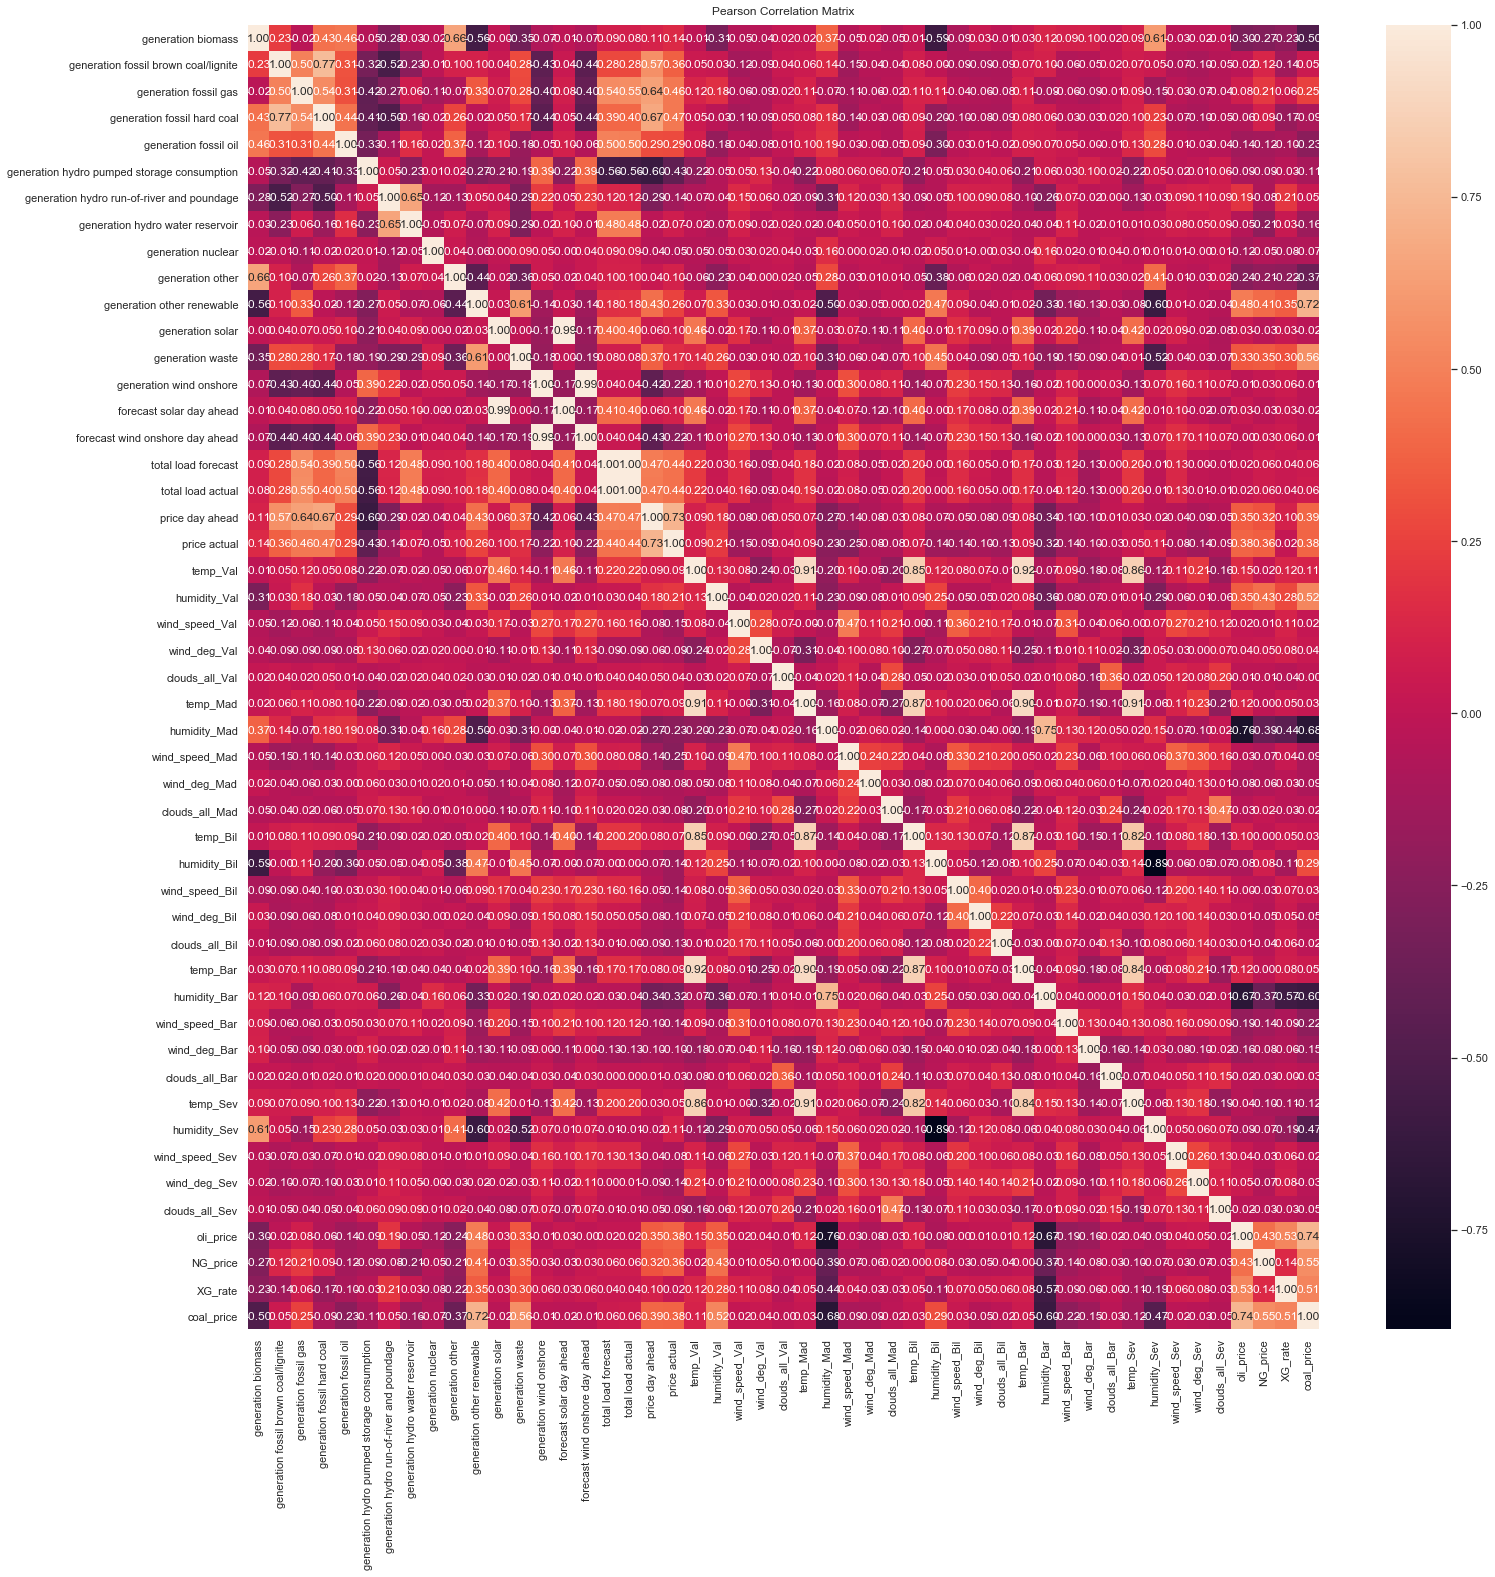

In [149]:
correlations = df_energy_fin.corr(method='pearson')
fig = plt.figure(figsize=(24, 24))
sns.heatmap(correlations, annot=True, fmt='.2f')
plt.title('Pearson Correlation Matrix')
plt.show()

In [203]:
#spliting the dataset into train and test
train_data = df_load_forcast.loc['2014-12-31 23:00:00+00:00':'2017-12-31 23:00:00+00:00'].copy()
test_data = df_load_forcast.loc['2018-01-01 00:00:00+00:00':'2018-12-31 23:00:00+00:00'].copy()

### Feature Selection
we will use XGBoost for unsderstanding feature importance 

Feature Importance in Gradient Boosting
A benefit of using gradient boosting is that after the boosted trees are constructed, it is relatively straightforward to retrieve importance scores for each attribute.

Generally, importance provides a score that indicates how useful or valuable each feature was in the construction of the boosted decision trees within the model. The more an attribute is used to make key decisions with decision trees, the higher its relative importance.

This importance is calculated explicitly for each attribute in the dataset, allowing attributes to be ranked and compared to each other.

Importance is calculated for a single decision tree by the amount that each attribute split point improves the performance measure, weighted by the number of observations the node is responsible for. The performance measure may be the purity (Gini index) used to select the split points or another more specific error function.

The feature importances are then averaged across all of the the decision trees within the model.

In [255]:
#spliting the dataset into train and test
train_end_idx = 27048
cv_end_idx = 31056
test_end_idx = 35063

df_train = df_load_forcast[:27048]

df_cv = df_load_forcast[27048:31056]

In [257]:
y_train = df_train['price actual'].values
y_cv = df_cv['price actual'].values
y_train = y_train.reshape(-1, 1)
y_cv = y_cv.reshape(-1, 1)

X_train = df_train.drop(['price actual', 'price day ahead'], axis=1)
X_cv = df_cv.drop(['price actual', 'price day ahead'], axis=1)
names = X_train.columns.values

In [258]:
scaler_price = MinMaxScaler(feature_range=(0, 1))
scaler_mult = MinMaxScaler(feature_range=(0, 1))

scaler_price.fit(y_train)
scaler_price.transform(y_train)
scaler_price.transform(y_cv)

scaler_mult.fit(X_train)
scaler_mult.transform(X_train)
scaler_mult.transform(X_cv)

array([[0.44932432, 0.        , 0.12070642, ..., 0.33052632, 1.04070623,
        0.99221744],
       [0.4527027 , 0.        , 0.11860013, ..., 0.33052632, 1.04070623,
        0.99221744],
       [0.44256757, 0.        , 0.11876215, ..., 0.33052632, 1.04070623,
        0.99221744],
       ...,
       [0.55067568, 0.63863864, 0.19944913, ..., 0.27789474, 0.62187347,
        1.2248276 ],
       [0.5625    , 0.64564565, 0.17298553, ..., 0.27789474, 0.62187347,
        1.2248276 ],
       [0.56756757, 0.65665666, 0.14916829, ..., 0.27789474, 0.62187347,
        1.2248276 ]])

In [263]:
param = {'eta': 0.03, 'max_depth': 2, 
         'subsample': 1.0, 'colsample_bytree': 0.80, 
         'alpha': 1.5, 'lambda': 1.5, 'gamma': 1.5,
         'objective': 'reg:linear', 'eval_metric': 'rmse', 
         'silent': 1, 'min_child_weight': 5, 'n_jobs': -1}

dtrain = xgb.DMatrix(X_train, y_train, feature_names=X_train.columns.values)
dtest = xgb.DMatrix(X_cv, y_cv, feature_names=X_cv.columns.values)
eval_list = [(dtrain, 'train'), (dtest, 'eval')]

xgb_model = xgb.train(param, dtrain, 200, eval_list)

[13:45:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[13:45:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:55.71547	eval-rmse:57.16536
[1]	train-rmse:54.11033	eval-rmse:55.48377
[2]	train-rmse:52.55515	eval-rmse:53.96031
[3]	train-rmse:51.05350	eval-rmse:52.46596
[4]	train-rmse:49.59269	eval-rmse:50.93366
[5]	train-rmse:48.17777	eval-rmse:49.45105
[6]	train-rmse:46.80685	eval-rmse:48.10619
[7]	train-rmse:45.47900	eval-rmse:46.71223
[8]	train-rmse:44.19274	eval-rmse:45.45274
[9]	train-rmse:42.94705	eval-rmse:44.14606
[10]	trai

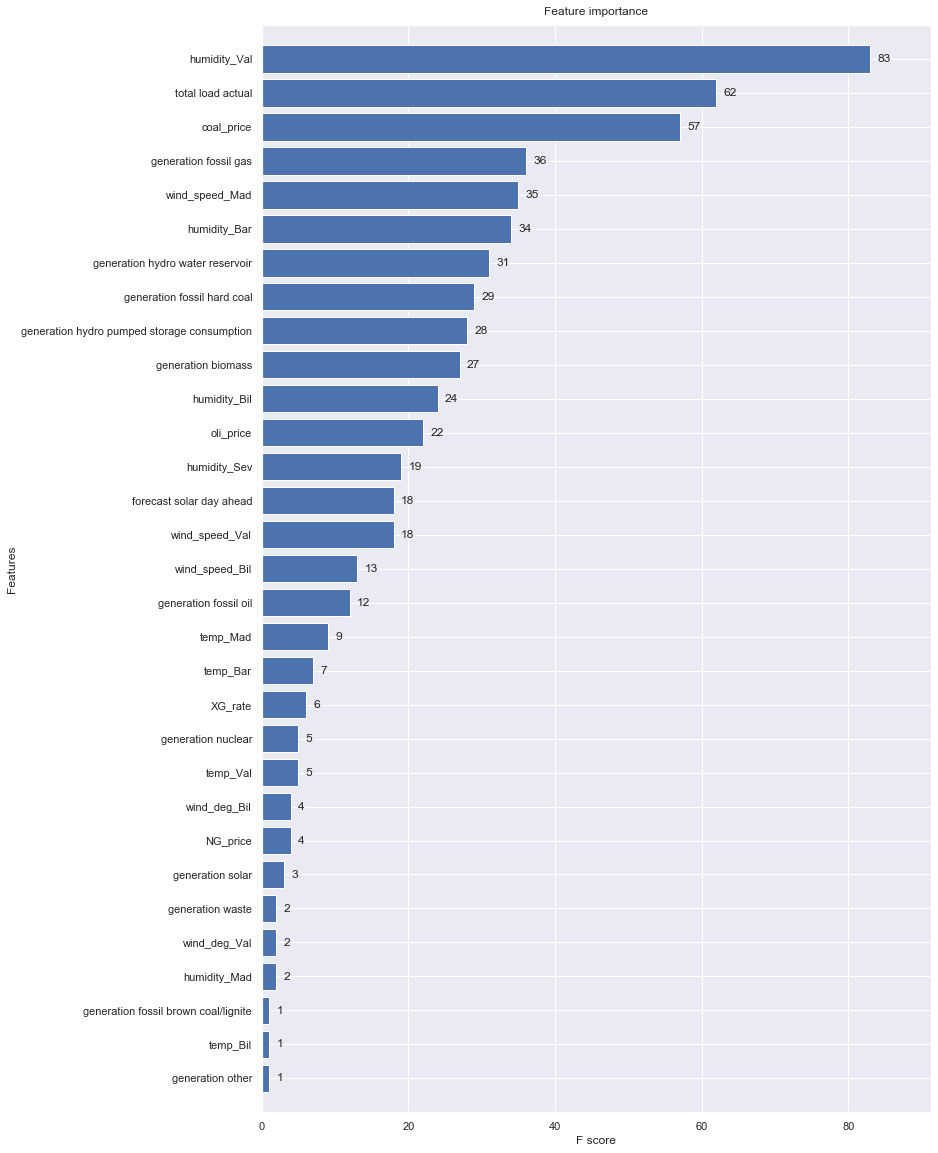

In [264]:
fig, ax = plt.subplots(figsize=(12, 20))
xgb.plot_importance(xgb_model, max_num_features=70, height=0.8, ax=ax)
plt.show()

In [265]:
correlations = df_train.corr(method='pearson')
correlations_price = abs(correlations['price actual'])
print(correlations_price[correlations_price > 0.20]
      .sort_values(ascending=False).to_string())

price actual                                   1.000000
price day ahead                                0.725862
generation fossil hard coal                    0.536698
generation fossil gas                          0.458971
total load actual                              0.450557
generation fossil brown coal/lignite           0.432433
generation hydro pumped storage consumption    0.411134
oli_price                                      0.364136
generation fossil oil                          0.351321
NG_price                                       0.338010
coal_price                                     0.291640
generation hydro run-of-river and poundage     0.242462
wind_speed_Mad                                 0.233457
generation biomass                             0.228573
humidity_Sev                                   0.204557
forecast wind onshore day ahead                0.203511
generation wind onshore                        0.202335


By comparing the coorelation matrix and the result of the XGBoost model we selected some features that we intailly expected these feature will have an effect on the forecasting we ignored sevral features for example the exchange rate was low on the importance grediant and the coorealtion matrix. 

We can see that the Hard Coal genration and the coal price has a higer importance and score in the correlation matrix as 20% of the Power genration in Spain comes from Coal

In [267]:
considered_features = ['generation fossil hard coal', 'generation fossil gas', 'total load actual', 'generation fossil brown coal/lignite',
                       'generation hydro pumped storage consumption', 'oli_price',
                       'generation fossil oil', 'NG_price',  
                       'coal_price', 'humidity_Val',
                       'total load actual','wind_speed_Mad']

In [273]:
len(considered_features)

values = df_load_forcast[considered_features].values

### Checking the RMSE for basline forcast provided with the datset 

We will compare the Price forcast to the actual value that are both provided in the dataset use and we will use this a baseline for the model we are bulding 

In [277]:
y = df_load_forcast['price actual'].values
y_forecast = df_load_forcast['price day ahead'].values

In [278]:
#spliting the dataset
y_train = y[:27048]
y_cv = y[27048 : 31056]
y_test = y[31056:]

In [279]:
rmse_tso_day = sqrt(mean_squared_error(y_test, y_forecast[31056:]))

print('RMSE of day-ahead electricity price forecast by TSO: {}'.format(round(rmse_tso_day, 3)))

RMSE of day-ahead electricity price forecast by TSO: 12.334


### Multivariate forecasts using Tensorflow keras LSTM

In [295]:

def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size
        
    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])
        
        if single_step:
            labels.append(target[i + target_size])
        else:
            labels.append(target[i : i + target_size])

    return np.array(data), np.array(labels)

In [296]:
#the spliting ratio for the test / train data 
train_end_idx = 27048
cv_end_idx = 31056
test_end_idx = 35063

In [297]:
#Assiging the testing dataset 
dataset = df_load_forcast[considered_features]

In [298]:
#scaling the values between 0 to 1  to reduse the time of computation  
scaler_mult = MinMaxScaler(feature_range=(0, 1))

scaler_mult.fit(dataset[:train_end_idx])

MinMaxScaler()

In [299]:
# prepraing the dataset and transforming its shape
y = df_load_forcast['price actual'].values

scaler = MinMaxScaler(feature_range=(0, 1))

y_reshaped = y.reshape(-1, 1)
scaler.fit(y_reshaped[:train_end_idx])

scaled_price = scaler.transform(y_reshaped)

In [300]:
scaled_dataset = scaler_mult.transform(dataset)

In [301]:
scaled_dataset = np.concatenate((scaled_dataset, scaled_price), axis=1)

In [302]:
# Set the number of previous time-lags that will be used

#multivariate_past_history = 3
#multivariate_past_history = 10
multivariate_past_history = 25

In [303]:
multivariate_future_target = 0

In [304]:
X_train_mult, y_train_mult = multivariate_data(scaled_dataset, scaled_dataset[:, -1],
                                               0, train_end_idx, 
                                               multivariate_past_history,
                                               multivariate_future_target,
                                               step=1, single_step=True)

In [305]:

X_val_mult, y_val_mult = multivariate_data(scaled_dataset, scaled_dataset[:, -1],
                                           train_end_idx, cv_end_idx, 
                                           multivariate_past_history,
                                           multivariate_future_target,
                                           step=1, single_step=True)

In [306]:
X_test_mult, y_test_mult = multivariate_data(scaled_dataset, scaled_dataset[:, -1],
                                             cv_end_idx, test_end_idx,
                                             multivariate_past_history,
                                             multivariate_future_target,
                                             step=1, single_step=True)

In [307]:
batch_size = 32
buffer_size = 1000

In [311]:

train_mult = tf.data.Dataset.from_tensor_slices((X_train_mult, y_train_mult))
train_mult = train_mult.cache().shuffle(buffer_size).batch(batch_size).prefetch(1)

In [312]:

val_mult = tf.data.Dataset.from_tensor_slices((X_val_mult, y_val_mult))
val_mult = val_mult.batch(batch_size).prefetch(1)

In [313]:

# Define some common parameters

input_shape_mult = X_train_mult.shape[-2:]
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
              lambda epoch: 1e-4 * 10**(epoch / 10))
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10)

In [314]:
y_test_mult_reshaped = y_test_mult.reshape(-1, 1)
y_test_mult_inv = scaler.inverse_transform(y_test_mult_reshaped)

In [315]:
#using Keras Sequential using the optimizer to find the best learning rate
tf.keras.backend.clear_session()

multivariate_lstm = tf.keras.models.Sequential([
    LSTM(80, input_shape=input_shape_mult, return_sequences=True),
    Flatten(),
    Dense(160, activation='relu'),
    Dropout(0.1),
    Dense(1)
])

optimizer = tf.keras.optimizers.Adam(lr=1e-4, amsgrad=True)
multivariate_lstm.compile(loss=loss,
                          optimizer=optimizer,
                          metrics=metric)

In [316]:
history_lr = multivariate_lstm.fit(train_mult, epochs=50,
                                   validation_data=val_mult,
                                   callbacks=[lr_schedule])

Epoch 1/50
845/845 [==============================] - 20s 23ms/step - loss: 0.0060 - root_mean_squared_error: 0.0773 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0590
Epoch 2/50
845/845 [==============================] - 19s 23ms/step - loss: 0.0031 - root_mean_squared_error: 0.0558 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0590
Epoch 3/50
845/845 [==============================] - 21s 25ms/step - loss: 0.0026 - root_mean_squared_error: 0.0506 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0568
Epoch 4/50
845/845 [==============================] - 18s 21ms/step - loss: 0.0022 - root_mean_squared_error: 0.0470 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0418
Epoch 5/50
845/845 [==============================] - 17s 20ms/step - loss: 0.0020 - root_mean_squared_error: 0.0443 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0407
Epoch 6/50
845/845 [==============================] - 17s 20ms/step - loss: 0.0017 - root_mean_squared_error: 0.0415 - val_loss: 0

In [319]:
def plot_learning_rate_schedule(history_lr, max_loss):
    plt.semilogx(history_lr.history['lr'], history_lr.history['loss'])
    plt.axis([1e-4, 1, 0, max_loss])
    plt.xlabel('Learning Rate')
    plt.ylabel('Training Loss')
    plt.show()

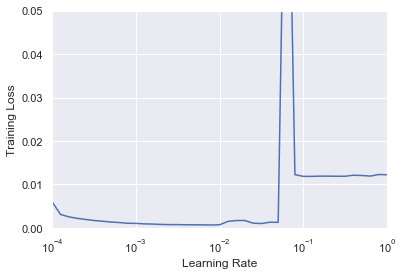

In [320]:
plot_learning_rate_schedule(history_lr, 0.05)

The learning rate that we will use for Adam is equal to 5e-3.

In [321]:
tf.keras.backend.clear_session()

multivariate_lstm = tf.keras.models.Sequential([
    LSTM(80, input_shape=input_shape_mult, return_sequences=True),
    Flatten(),
    Dense(160, activation='relu'),
    Dropout(0.1),
    Dense(1)
])

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
                   'multivariate_lstm.h5', monitor=('val_loss'), save_best_only=True)
optimizer = tf.keras.optimizers.Adam(lr=5e-3, amsgrad=True)

multivariate_lstm.compile(loss=loss,
                          optimizer=optimizer,
                          metrics=metric)

In [322]:
history = multivariate_lstm.fit(train_mult, epochs=120,
                                validation_data=val_mult,
                                callbacks=[early_stopping, 
                                           model_checkpoint])

Epoch 1/120
845/845 [==============================] - 20s 23ms/step - loss: 0.0427 - root_mean_squared_error: 0.2099 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0562
Epoch 2/120
845/845 [==============================] - 17s 21ms/step - loss: 0.0033 - root_mean_squared_error: 0.0573 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0566
Epoch 3/120
845/845 [==============================] - 18s 21ms/step - loss: 0.0025 - root_mean_squared_error: 0.0503 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0430
Epoch 4/120
845/845 [==============================] - 18s 21ms/step - loss: 0.0019 - root_mean_squared_error: 0.0438 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0363
Epoch 5/120
845/845 [==============================] - 18s 22ms/step - loss: 0.0016 - root_mean_squared_error: 0.0397 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0322
Epoch 6/120
845/845 [==============================] - 20s 24ms/step - loss: 0.0013 - root_mean_squared_error: 0.0366 - val_l

In [324]:

def plot_model_rmse_and_loss(history):
    
    # Evaluate train and validation accuracies and losses
    
    train_rmse = history.history['root_mean_squared_error']
    val_rmse = history.history['val_root_mean_squared_error']
    
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # Visualize epochs vs. train and validation accuracies and losses
    
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.plot(train_rmse, label='Training RMSE')
    plt.plot(val_rmse, label='Validation RMSE')
    plt.legend()
    plt.title('Epochs vs. Training and Validation RMSE')
    
    plt.subplot(1, 2, 2)
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend()
    plt.title('Epochs vs. Training and Validation Loss')
    
    plt.show()

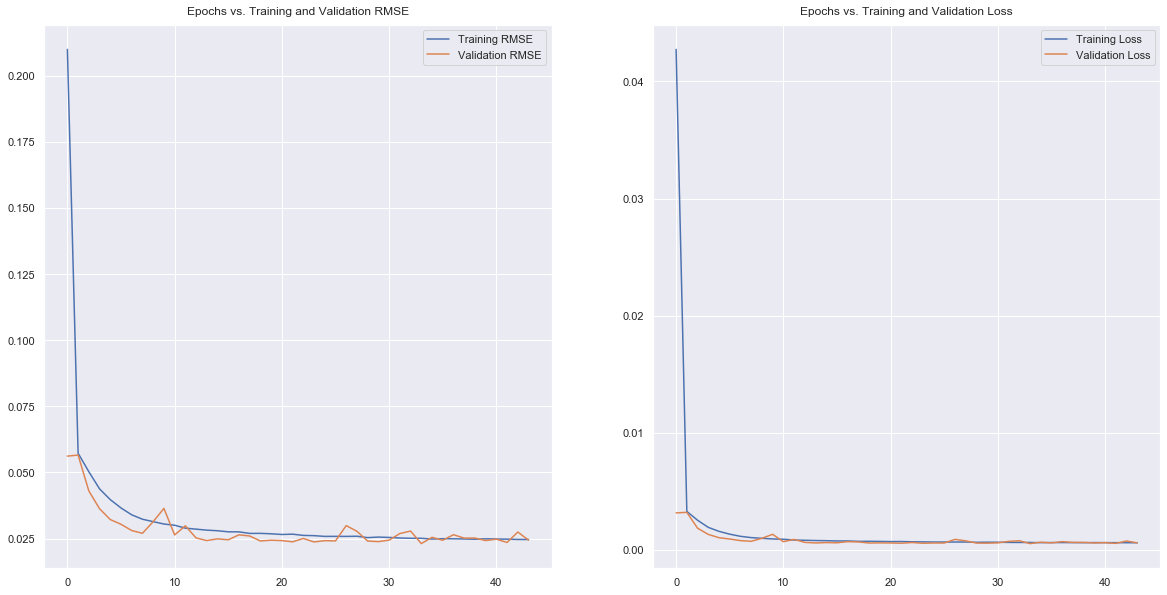

In [325]:
plot_model_rmse_and_loss(history)

In [326]:
multivariate_lstm = tf.keras.models.load_model('multivariate_lstm.h5')

forecast = multivariate_lstm.predict(X_test_mult)
multivariate_lstm_forecast = scaler.inverse_transform(forecast)

rmse_mult_lstm = sqrt(mean_squared_error(y_test_mult_inv,
                                         multivariate_lstm_forecast))
print('RMSE of hour-ahead electricity price multivariate LSTM forecast: {}'
      .format(round(rmse_mult_lstm, 3)))

RMSE of hour-ahead electricity price multivariate LSTM forecast: 2.257


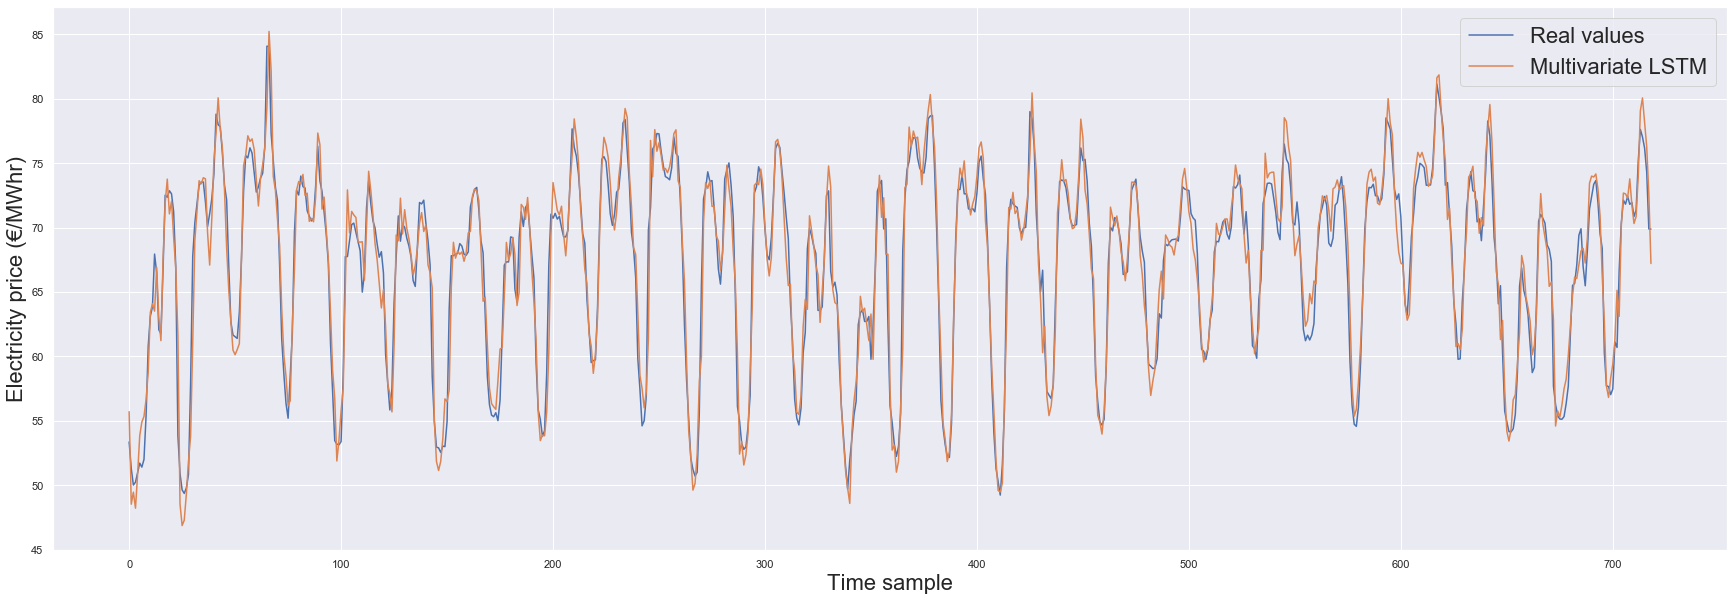

In [328]:

fig, ax = plt.subplots(figsize=(30, 10))
ax.set_xlabel('Time sample', fontsize=22)
ax.set_ylabel('Electricity price (€/MWhr)', fontsize=22)
ax.plot(y_test_mult_inv[3263:], label='Real values')
ax.plot(multivariate_lstm_forecast[3263:], label='Multivariate LSTM')
ax.legend(prop={'size':22})
plt.show()

## Conclusion
Based on the results of the RMSE of 2.257 which is far better than the prediction values provided by the TSO which is 12.334
From the analysis We will need to add more features related to the time as the Week day or weekend also the hour of the week as this has a high effect on the generation

Many variables that had a high prediction power was actually expected and made full since as they have a direct effect either on the load requirements or the cost of generation 

I was expecting to see more of the temperature variables having effects on the prediction power however it was not, and this may be because the temperature difference in Spain from summer to winter is not so huge.

I was expecting to see very clear seasonality in the load, but it was not very clear and this also can be because the difference in temperatures between winter and summer is not as huge as in Canada for an example.


### App Deployment

An app that uses the model will be developed on using Dash to help in predicting the load an the cost of MWH and it will be taking into consideration the weather conditions and the price of Fossil fuels of the day.

Github Link: https://github.com/tamerhanna/Forecasting-The-Spanish-Electricity-Power-Generation.git